# HEART DISEASE PREDICTION 

In this project, we will test out several supervised learning models to predict heart disease in individuals.

The dataset is a subset of the data published on the UCI Machine Learning repository at https://archive.ics.uci.edu/ml/datasets/heart+disease which was originally collected from the four following locations:
<ol>
     <li>Cleveland Clinic Foundation (cleveland.data)</li>
     <li>Hungarian Institute of Cardiology, Budapest (hungarian.data)</li>
     <li>V.A. Medical Center, Long Beach, CA (long-beach-va.data)</li>
    <li>University Hospital, Zurich, Switzerland (switzerland.data)</li>
</ol>
The dataset is a collection of health and personal attributes of patients concerning heart disease diagnosis. Its source is data is the V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

The target field refers to the presence of heart disease in the patient and it is an integer valued as 0 (no presence) or 1 (presence)

Attribute information:

- age: age in years
- sex: sex (1 = male; 0 = female)
- cp: chest pain type
    - Value 0: asymptomatic
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: typical angina

- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholesterol in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping 
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

# Exploring the data

Import the necessary libraries, read the data and explore the dataset

In [2]:
import pandas as pd
import numpy as np

from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns

# pretty display for notebooks
%matplotlib inline  

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'

# sets the Seaborn default color palette 
sns.set()
# Larger scale for plots in notebooks
sns.set_context('notebook')

# load dataset
datafile = "heart.csv"
df = pd.read_csv(datafile)

# Display first 10 records
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.shape

(303, 14)

The dataset contains 303 instances and 13 features. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


All variables are numerical. 

There are no missing values and all categorical variables are encoded.

The target variable is called **target** and it's a binary variable with values: 0 for no disease and 1 for disease.

In [5]:
# define target variable
target = "target"

Let's investigate the proportion of heart deseases in the dataset.

The percentage of patients with heart disease is 0.54


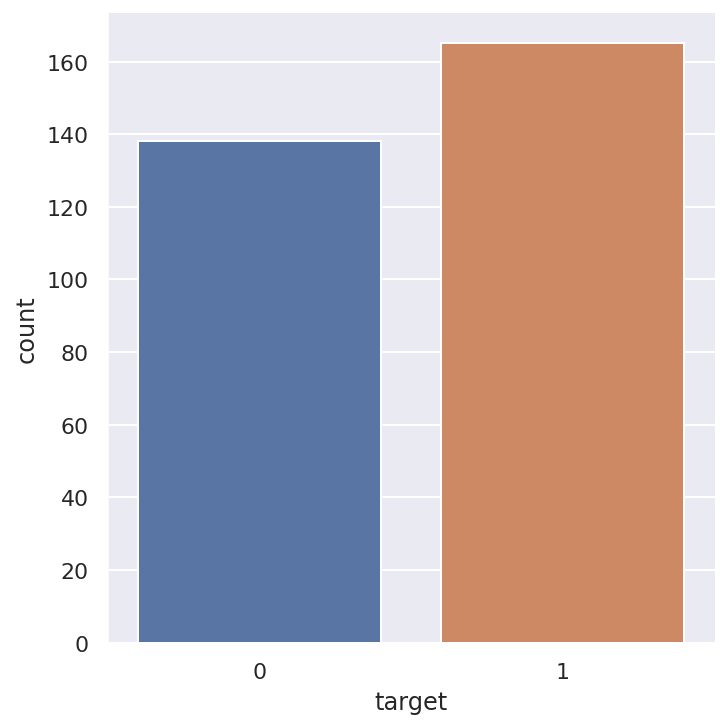

In [6]:
disease_percent = sum(df[target])/df.shape[0]

print(f"The percentage of patients with heart disease is {round(disease_percent,2)}")

sns.catplot(x=target, kind="count", data=df)


The target class is balanced.

### Analyzing numerical features

In [10]:
# define numerical columns
numerical_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Assign meaningful names to columns
numerical_cols_labels = {"age": "Age",
                         "trestbps": "Resting blood pressure",
                         "chol": "Serum cholestoral in mg/dl",
                         "thalach": "Maximum heart rate achieved",
                         "oldpeak": "ST depression induced by exercise relative to rest"
                         }

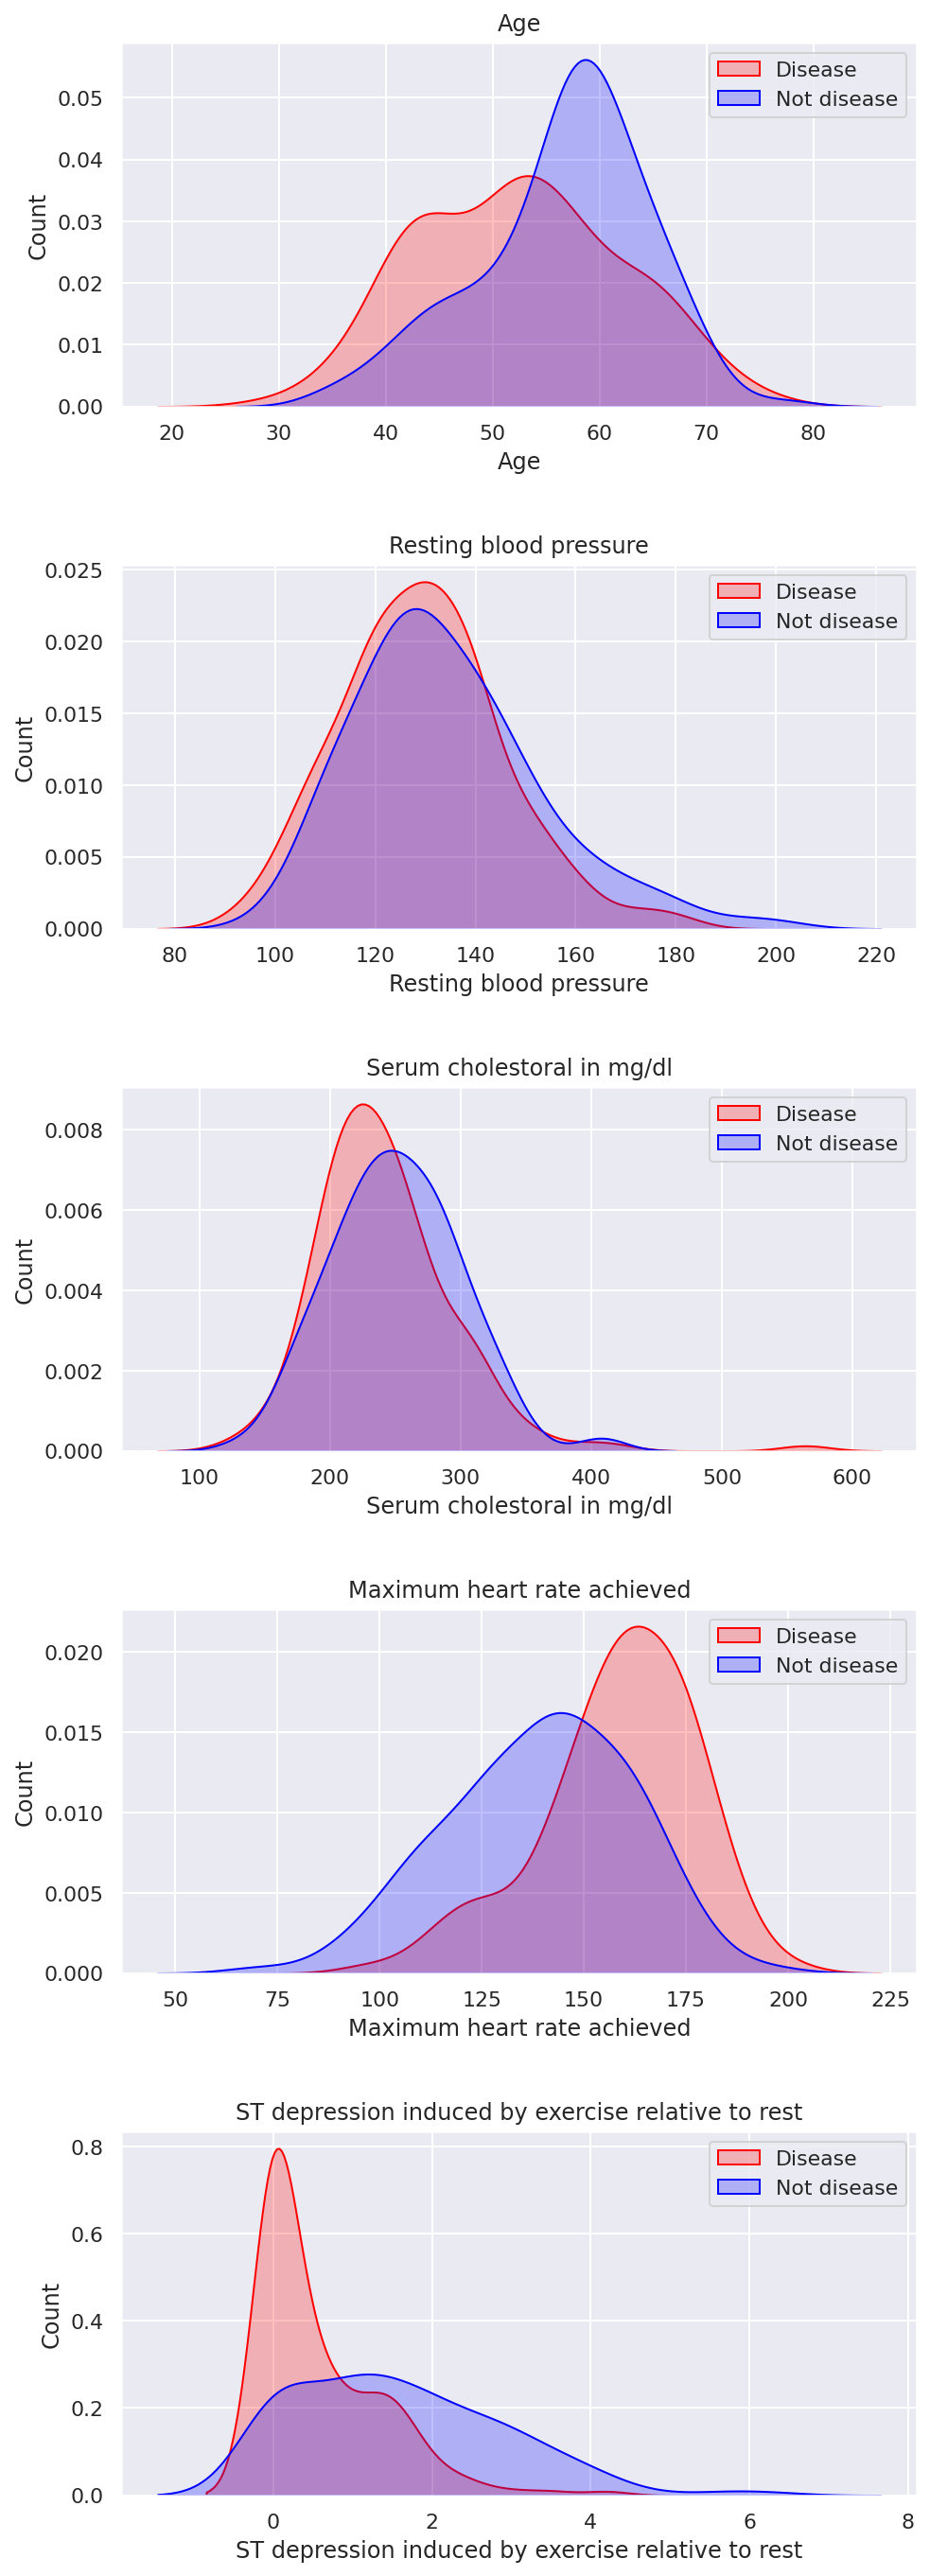

In [11]:
# Investigate relations between numerical variables and categorical target variable 
fig, axList = plt.subplots(nrows=5, ncols=1)
                           
axList = axList.flatten()
fig.set_size_inches(8,20)   # size of plot
fig.tight_layout(pad=5.0)  # space between subplots                     

    
for count, ax in enumerate(axList):
    if count > len(numerical_cols)-1:
        break;
        
    col_name = numerical_cols[count]
    #ax.hist(df[df["target"]==1][col_name], bins=15, alpha=0.5, color="red", label="Disease")
    #ax.hist(df[df["target"]==0][col_name], bins=15, alpha=0.5, color="blue", label="Not disease")  
    
    #kde plot version
    sns.kdeplot(df[df["target"]==1][col_name], shade=True, color="red", label="Disease", ax=ax)
    sns.kdeplot(df[df["target"]==0][col_name], shade=True, color="blue", label="Not disease", ax=ax)  
    
    ax.set_xlabel(numerical_cols_labels[col_name])
    ax.set_ylabel("Count")
    
    ax.set_title(f"{numerical_cols_labels[col_name]}")

    ax.legend() # displays the label as a legend

    


The maximum heart rate seems a good predictor for the target variable. 

The average age of patients with heart disease is lower than that of healthy patients.

There is no direct effect of resting blood pressure or serum choresterol in the target variable.

Patients with higher heart rates are more likely to suffer heart disease.

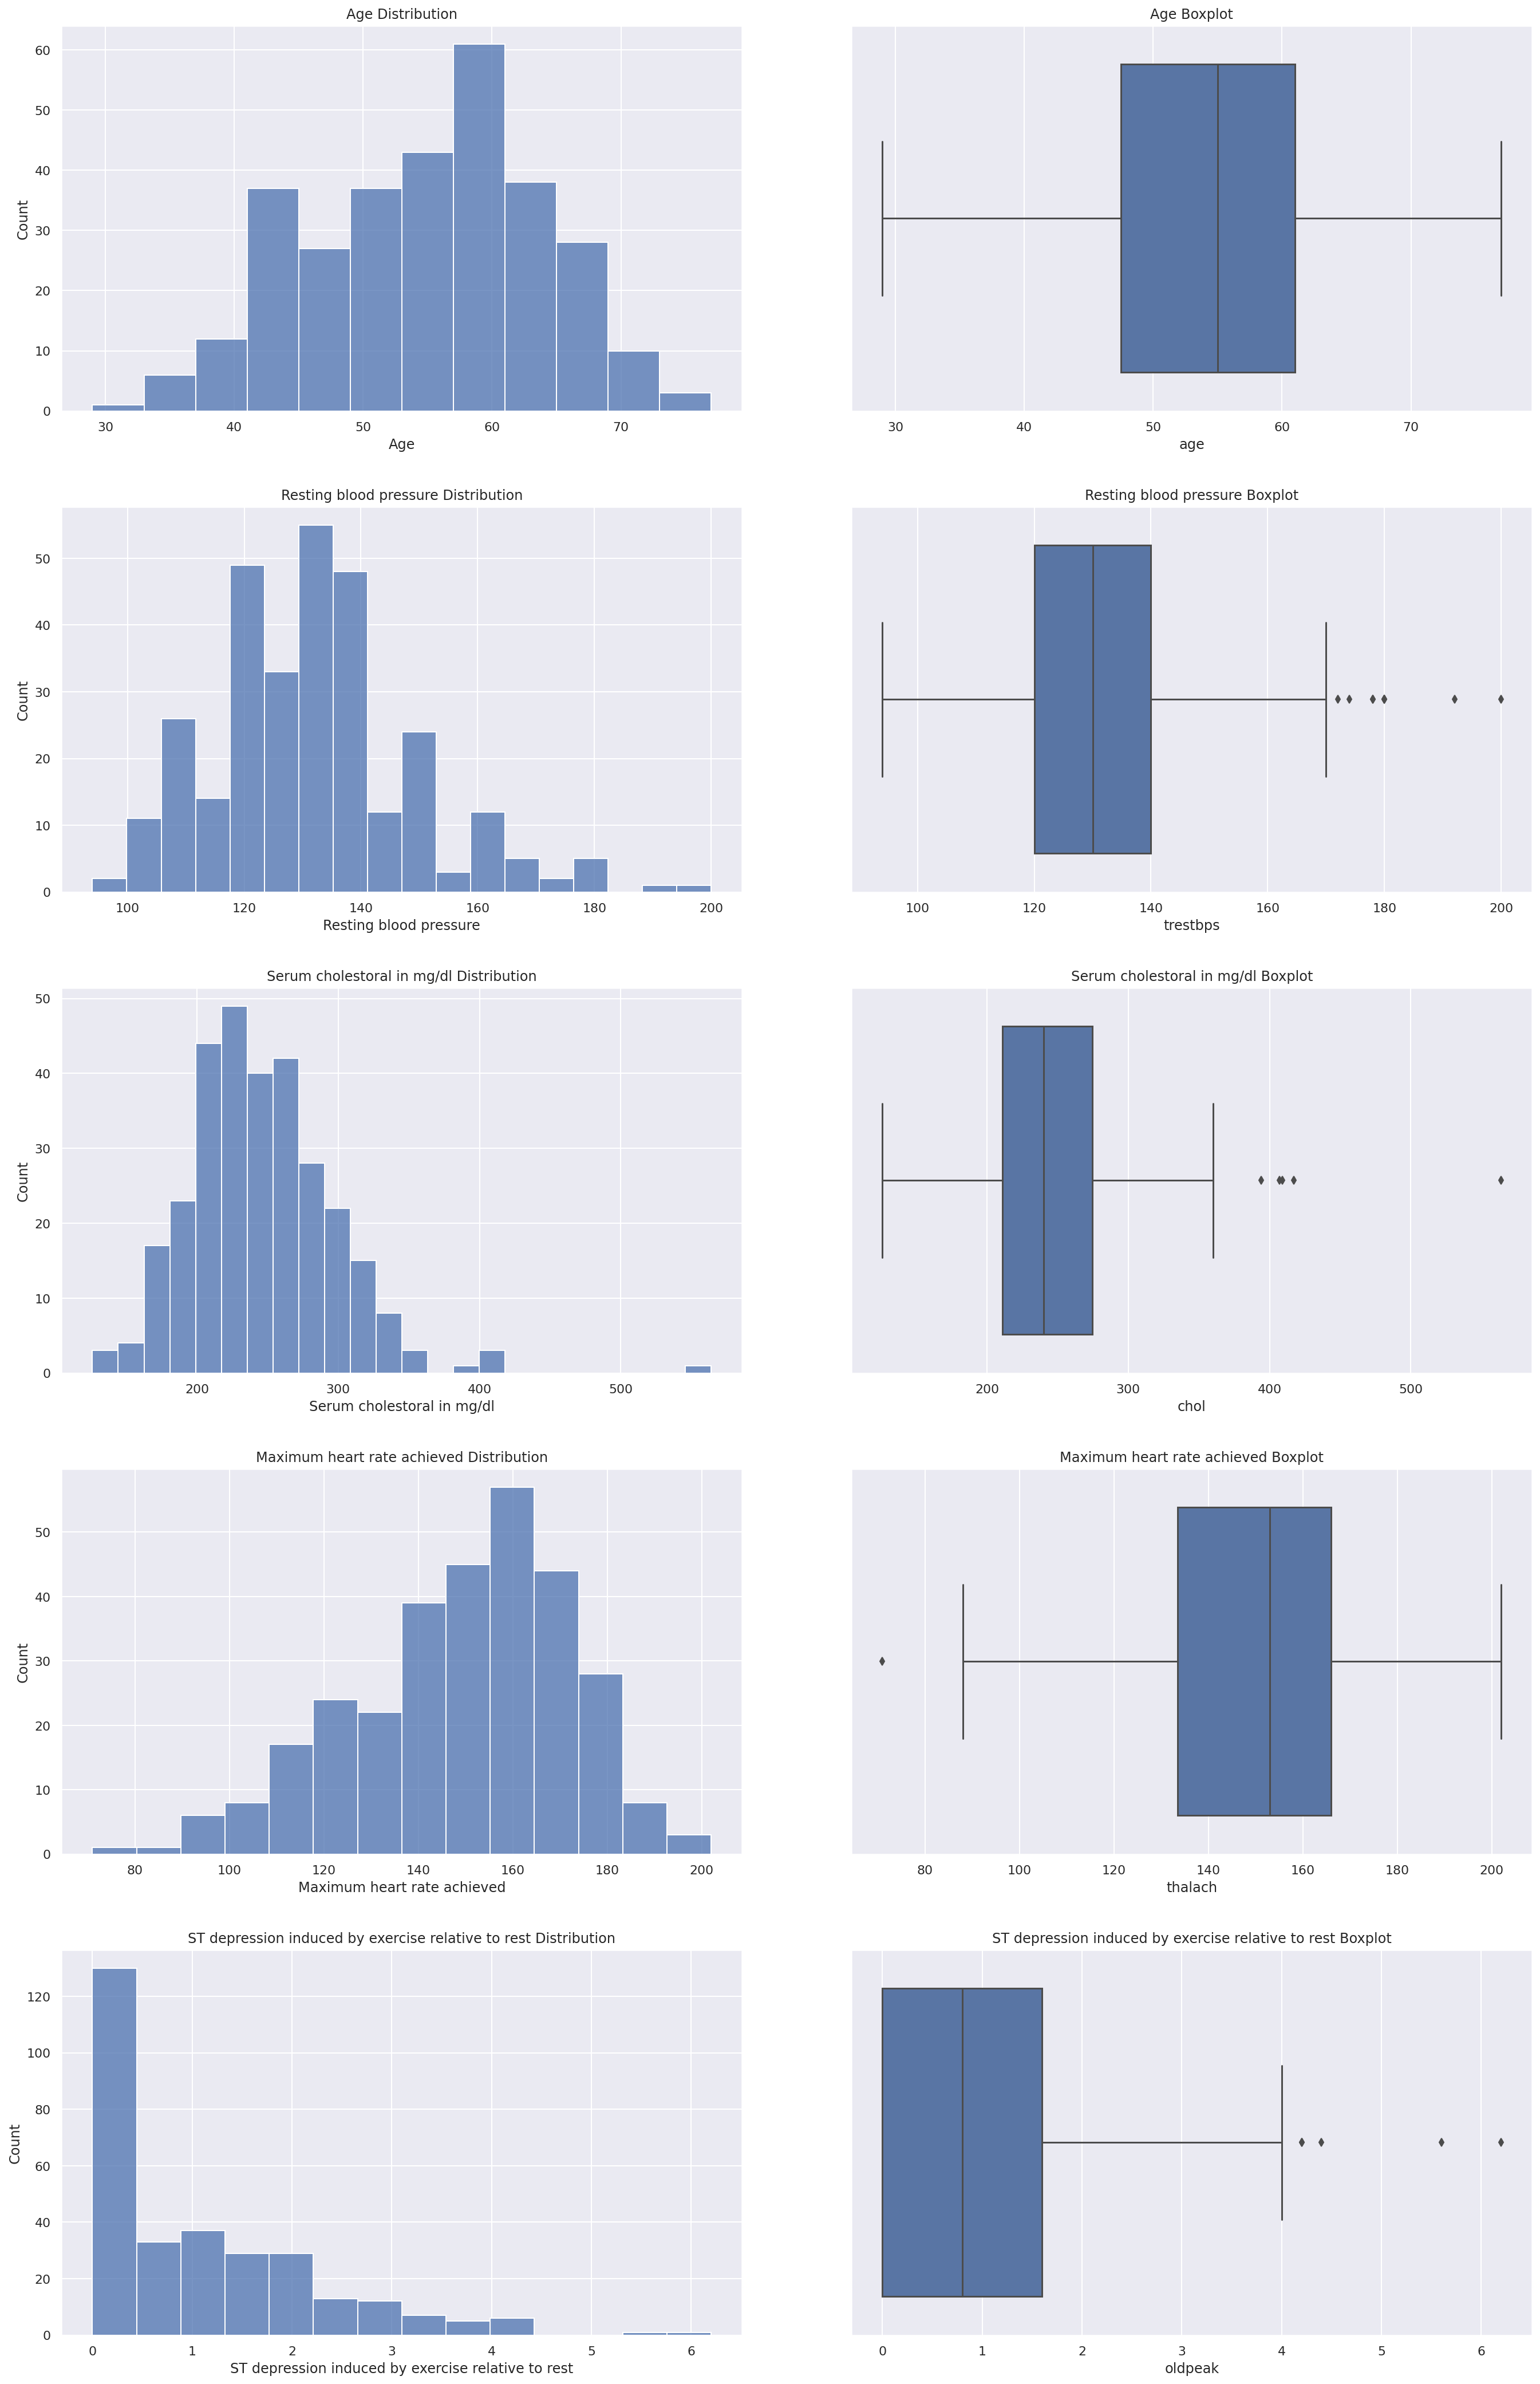

In [12]:
# Explore the distribution of the variables and ouliers
fig, axList = plt.subplots(nrows=5, ncols=2)

fig.set_size_inches(20,30)   # size of plot
fig.tight_layout(pad=5.0)  # space between subplots  

#axList = axList.flatten()

for count, col_name in enumerate(numerical_cols):
    axList[count, 0].set_title('{} Distribution'.format(numerical_cols_labels[col_name]))
    axList[count, 0].set_xlabel(numerical_cols_labels[col_name])
    sns.histplot(ax=axList[count, 0], x=df[col_name])
      
    axList[count, 1].set_title('{} Boxplot'.format(numerical_cols_labels[col_name]))
    axList[count, 1].set_xlabel(numerical_cols_labels[col_name])
    sns.boxplot(ax=axList[count, 1], x=df[col_name])


    


The age is normally distributed.

The variables pressure, choresterol and ST depression are right (positive) skewed. The skew for these variables can be partly explained by the existence of a significant number of outliers in the fourth quartile of the sample.

The heart rate is left skewed.


In [16]:
# Investigate the correlation between the feature variables

target_col = "target"
# Calculate the correlation values
feature_cols = [col for col in df.columns if col != target_col]
corr_values = df[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN



corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()
corr_values.sort_values(by="abs_correlation", ascending = False)

,feature1,feature2,correlation,abs_correlation
72,oldpeak,slope,-0.577537,0.577537
6,age,thalach,-0.398522,0.398522
28,cp,exang,-0.394280,0.394280
65,thalach,slope,0.386784,0.386784
63,thalach,exang,-0.378812,0.378812
...,...,...,...,...
62,restecg,thal,-0.011981,0.011981
44,chol,thalach,-0.009940,0.009940
51,fbs,thalach,-0.008567,0.008567
53,fbs,oldpeak,0.005747,0.005747


There is no significant multicolliniarity between the features. 

A slightly high correlation is observed between ST depression induced by exercise (“oldpeak”) and the slope of the peak exercise (“slope”). 
 

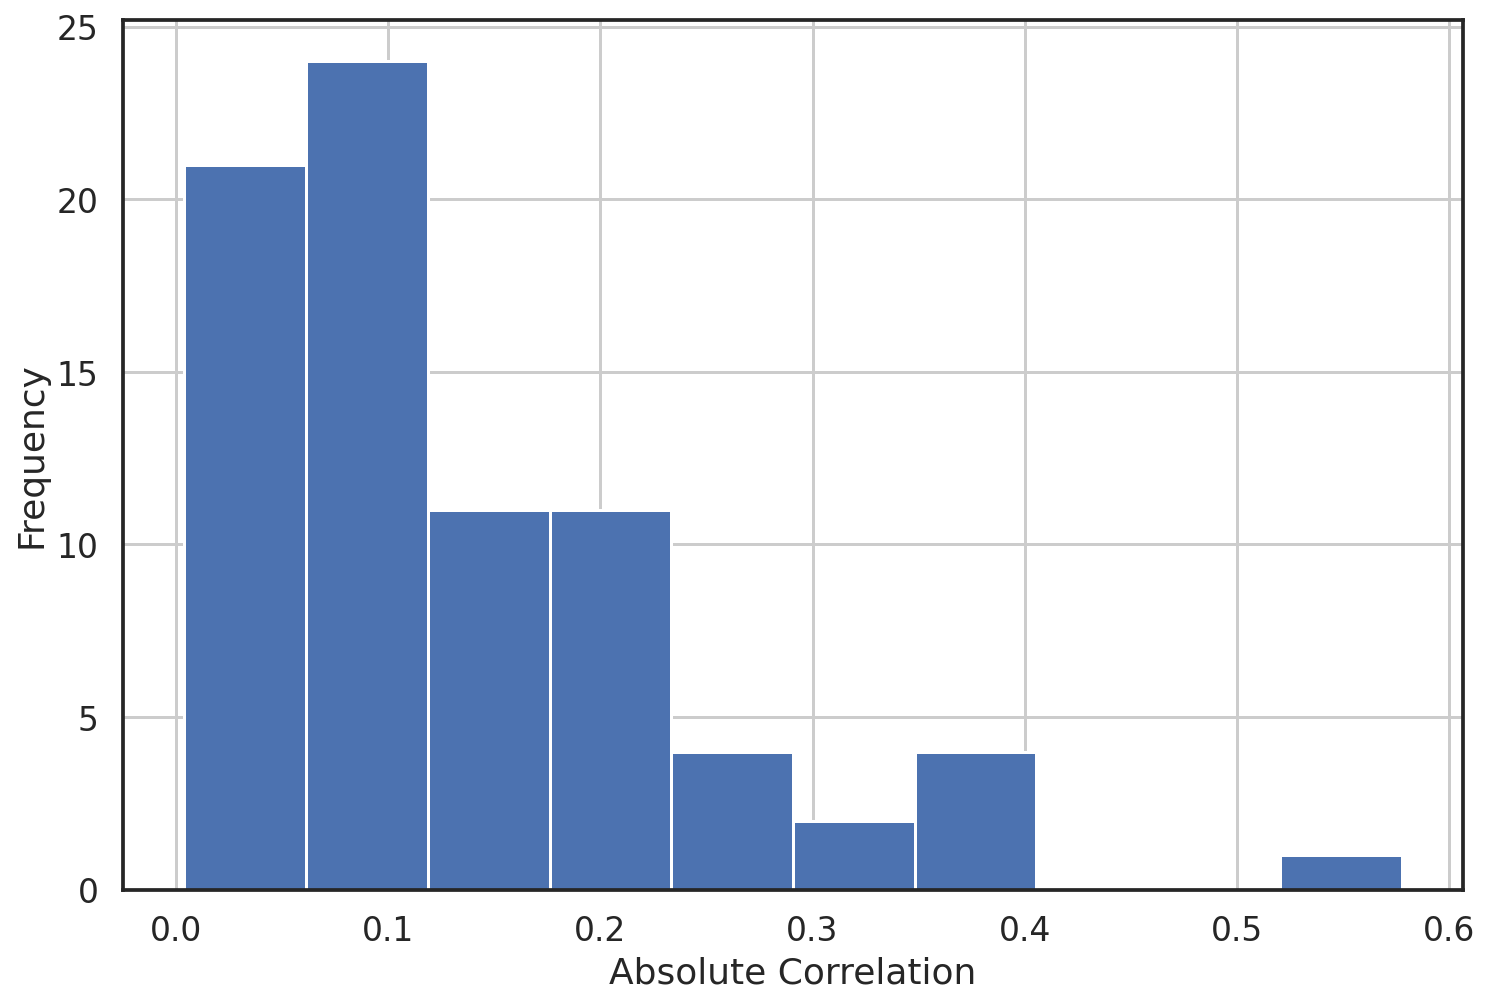

In [17]:
# Display the absolute values of the correlations
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=10, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

The distribution of correlations is right skewed which confirms that most features show little correlation.

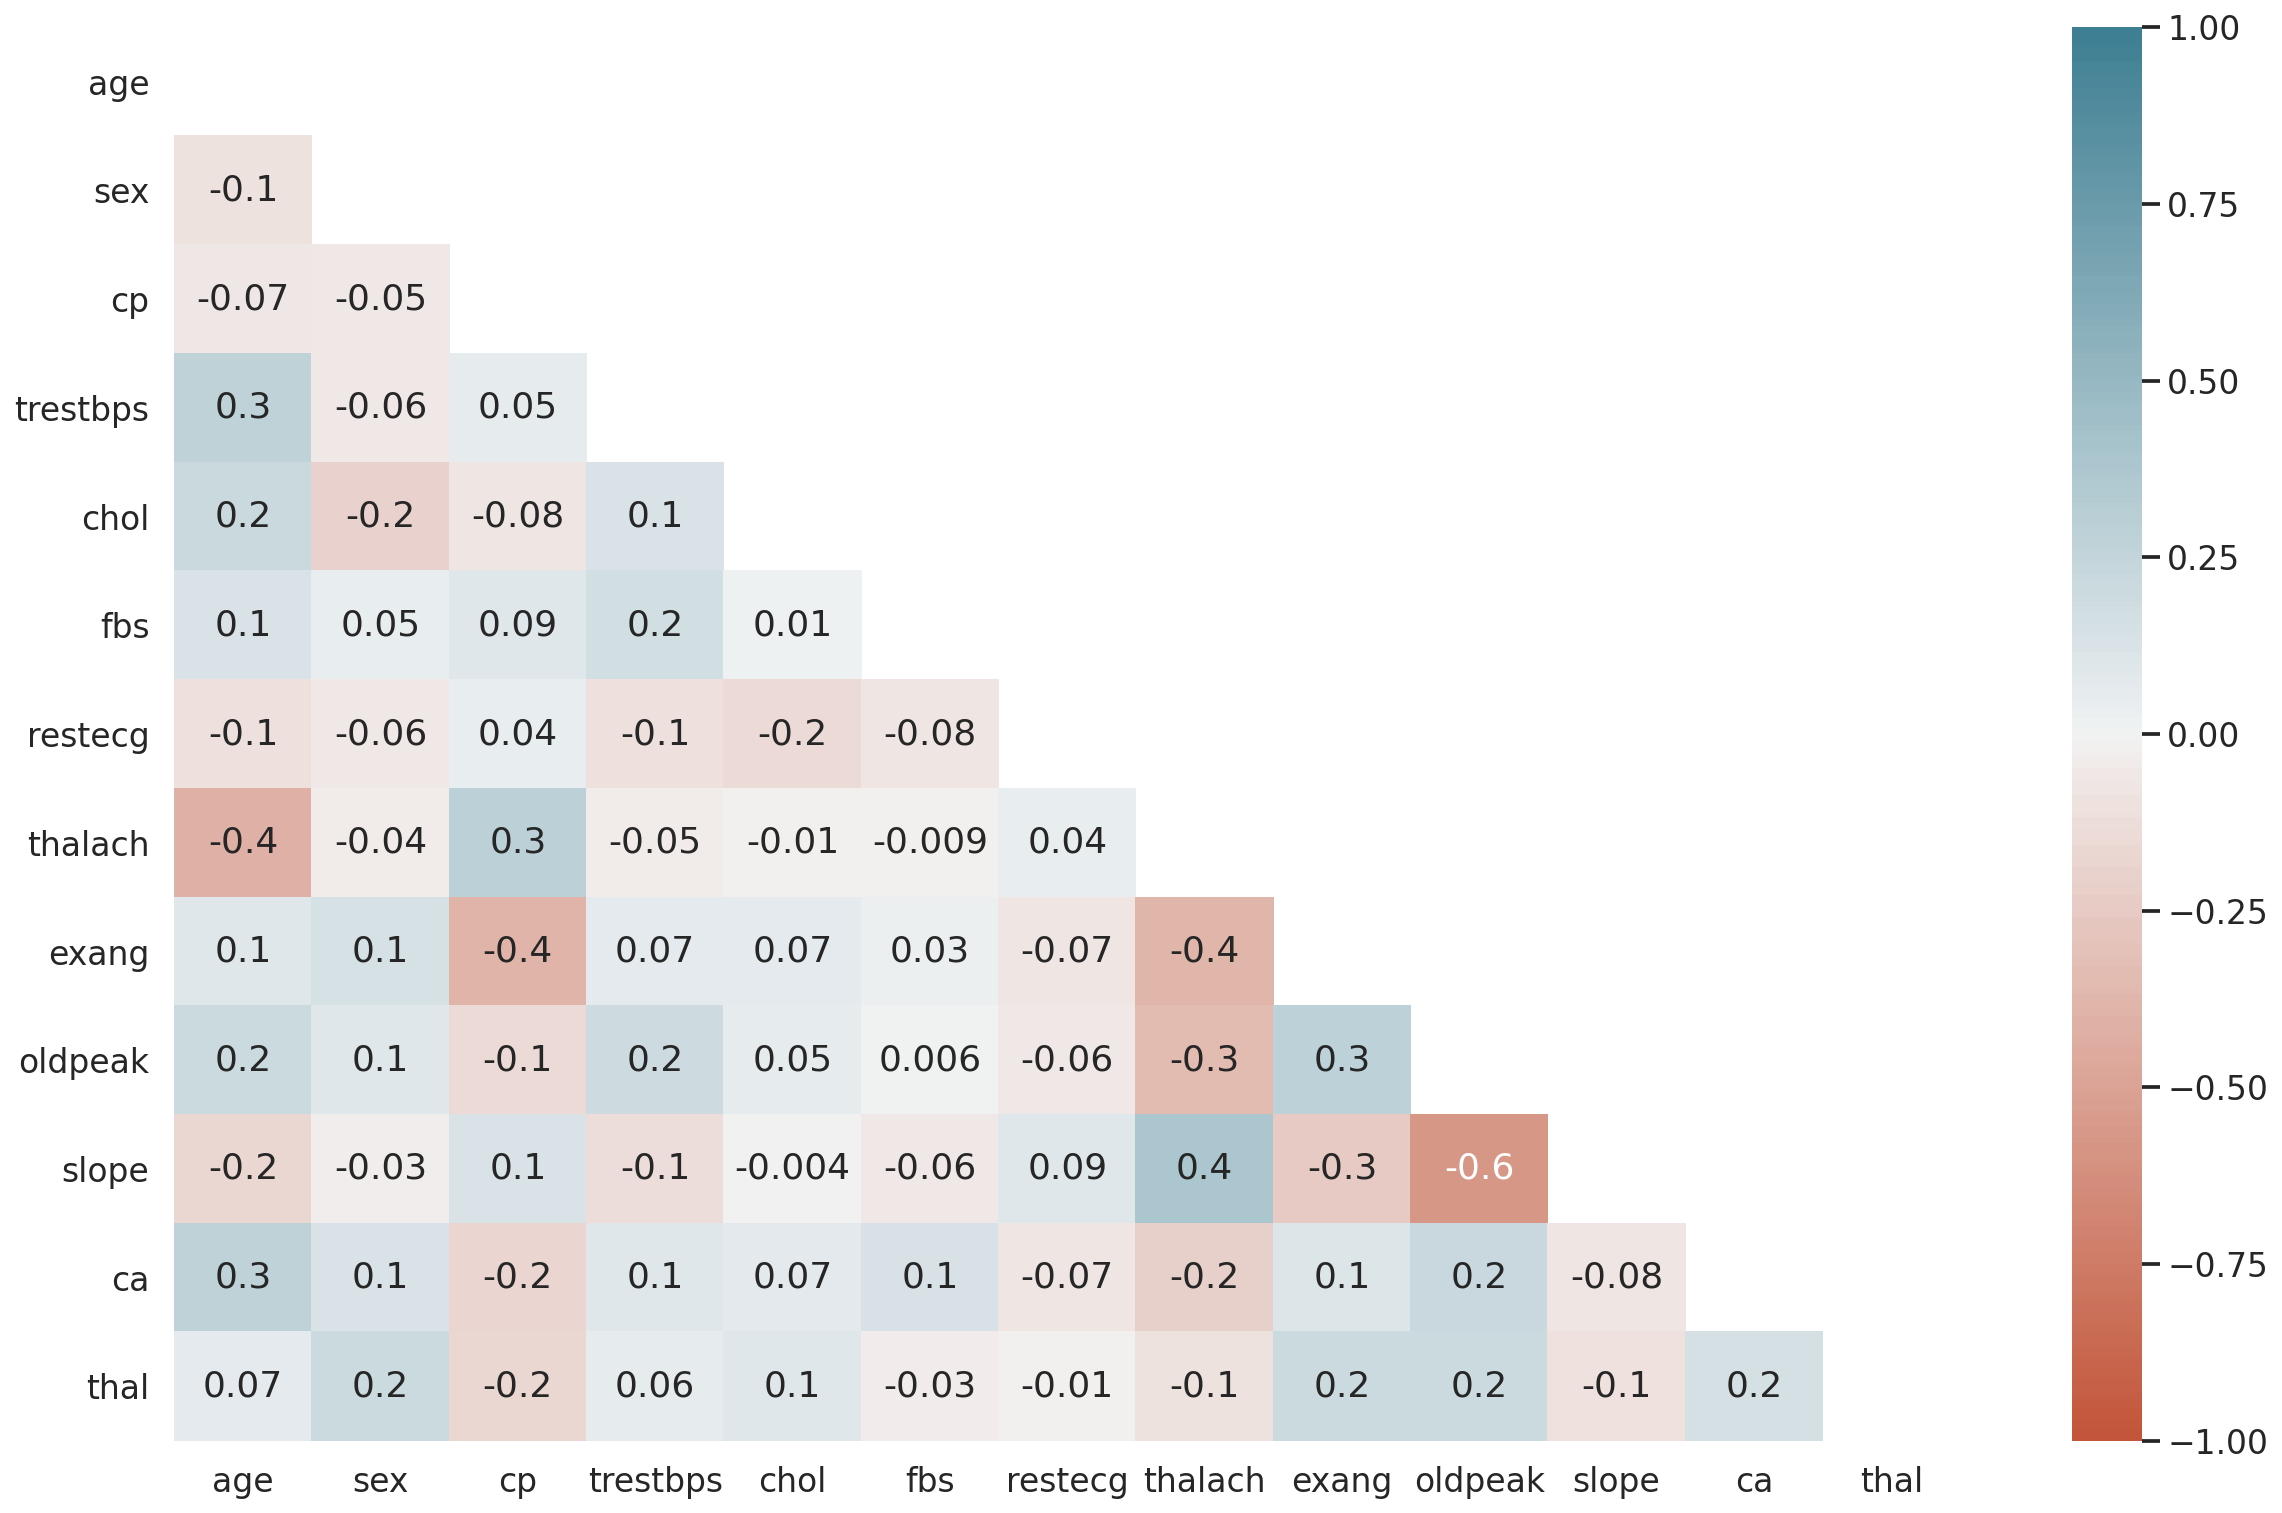

In [18]:
# Display correlation heatmap
corr_values = df[feature_cols].corr()
matrix = np.triu(corr_values)


plt.subplots(figsize=(20,13))
g = sns.heatmap(data=corr_values,
                  mask=matrix,
                  annot=True, 
                  vmin=-1, vmax=1, center=0,
                  cmap=sns.diverging_palette(20, 220, n=200), #'coolwarm'                  
                  fmt='.1g')
g.set_facecolor('xkcd:white') # this is to set the background to white

### Analyzing categorical features

In [19]:
# define categorical columns

cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# give meaningful names to columns
cat_cols_labels = {"sex": "Sex",
                         "cp": "Chest pain type",
                         "fbs": "Fasting blood sugar",
                         "restecg": "Resting electrocardiographic results",
                         "exang": "Exercise induced angina",
                         "slope": "Slope of the peak exercise ST segment",
                         "ca": "number of major vessels colored by flourosopy",
                         "thal": "Thal"}

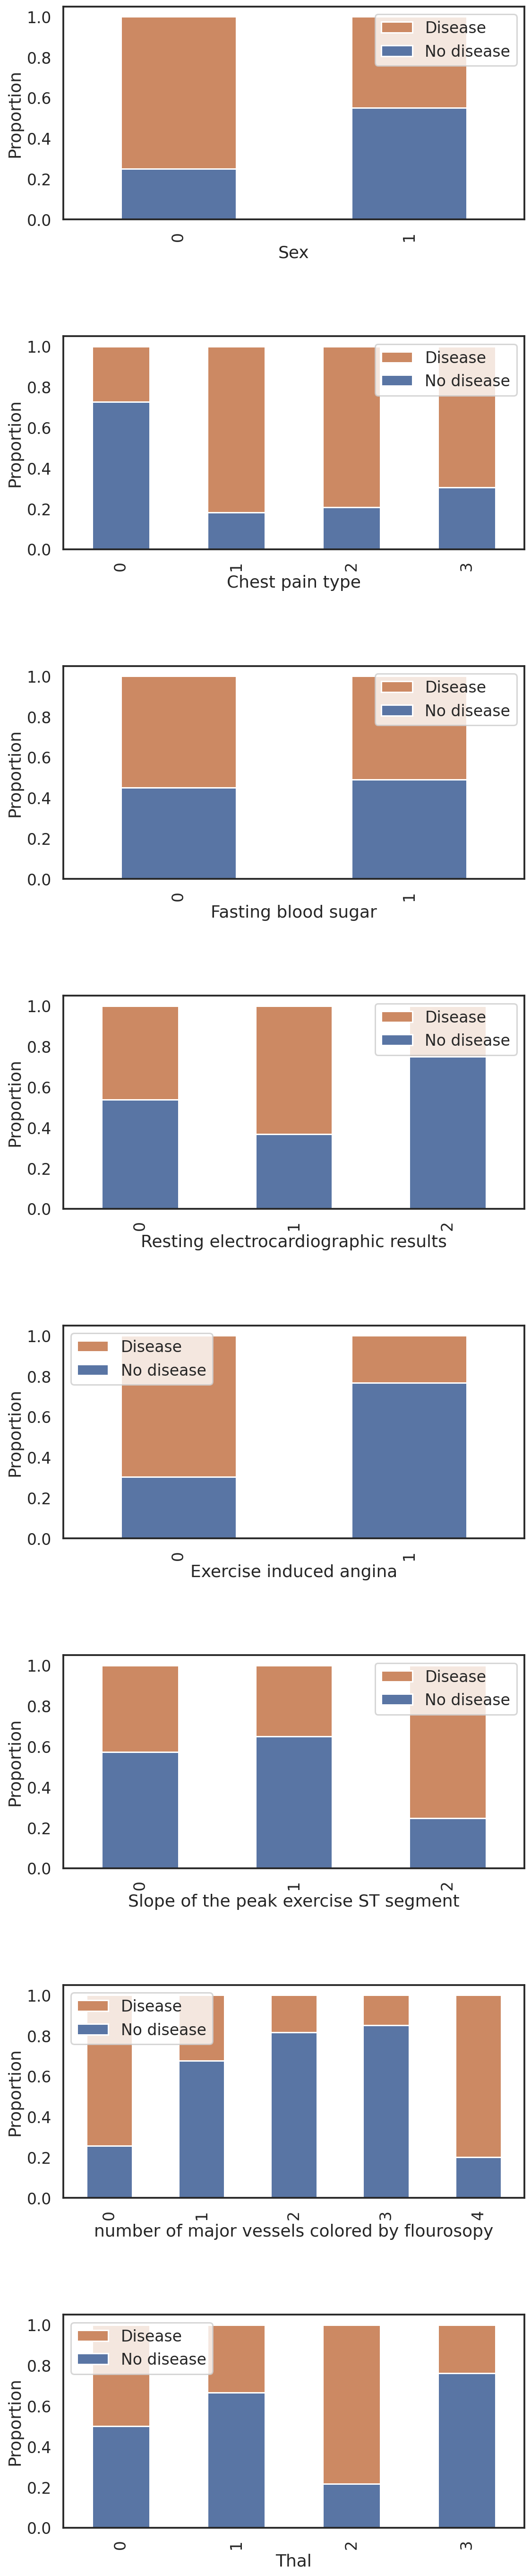

In [20]:
from matplotlib.patches import Patch
# Investigate relations between numerical variables and cartegorical target variable 
fig, axList = plt.subplots(nrows=8, ncols=1)
                           
axList = axList.flatten()
fig.set_size_inches(10,40)   # size of plot
fig.tight_layout(pad=5.0)  # space between subplots                     

    
for count, ax in enumerate(axList):
    
        
    col_name = cat_cols[count]
    
    counts_df = df.groupby([col_name, "target"])["target"].count().unstack()
    target_percents_df = counts_df.T.div(counts_df.T.sum()).T
    
    target_percents_df.plot(kind="bar", stacked=True, color=["#5975A4", "#CC8963"], ax=ax)
    ax.set_xlabel(cat_cols_labels[col_name])
    #ax.set_xticklabels(["Mailed check", "Electronic check", "Bank transfer", "Credit card"], rotation=0)
    ax.set_ylabel("Proportion")

    color_patches = [
        Patch(facecolor="#CC8963", label="Disease"),
        Patch(facecolor="#5975A4", label="No disease")
    ]
    ax.legend(handles=color_patches)


    
  



Patients with asymptomatic chest pain (value 0) shows a small proportion of heart diseases.

Those patients with exercise induced angina are less prone to heart disease.

Female patients have significatively more heart diseases than male.


# Preparing the data


The dataset has no missing values and all categorical variables are encoded.



The EDA in previous section showed some skewed variables. Let's inspect them more in detail. 

### Log transforming skew variables

In [21]:
# Check up skew in numerical columns

skew_vals = df[numerical_cols].skew()

# define a limit above which we will log transform
skew_limit = 0.7 
skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending=True)

trestbps    0.713768
chol        1.143401
oldpeak     1.269720
dtype: float64

In [22]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
oldpeak,1.269720
chol,1.143401
trestbps,0.713768


These features are highly skewed. 

We apply a log-transformation on these variables which works well with right-skewed distributions. Log normal distributions would result in normal distributions. Other distributions would either get closer to normal or reduce the heavy tails. 

The log-transformation will be applied in the form of natural logaritm plus one to avoid issues with values equal to 0.

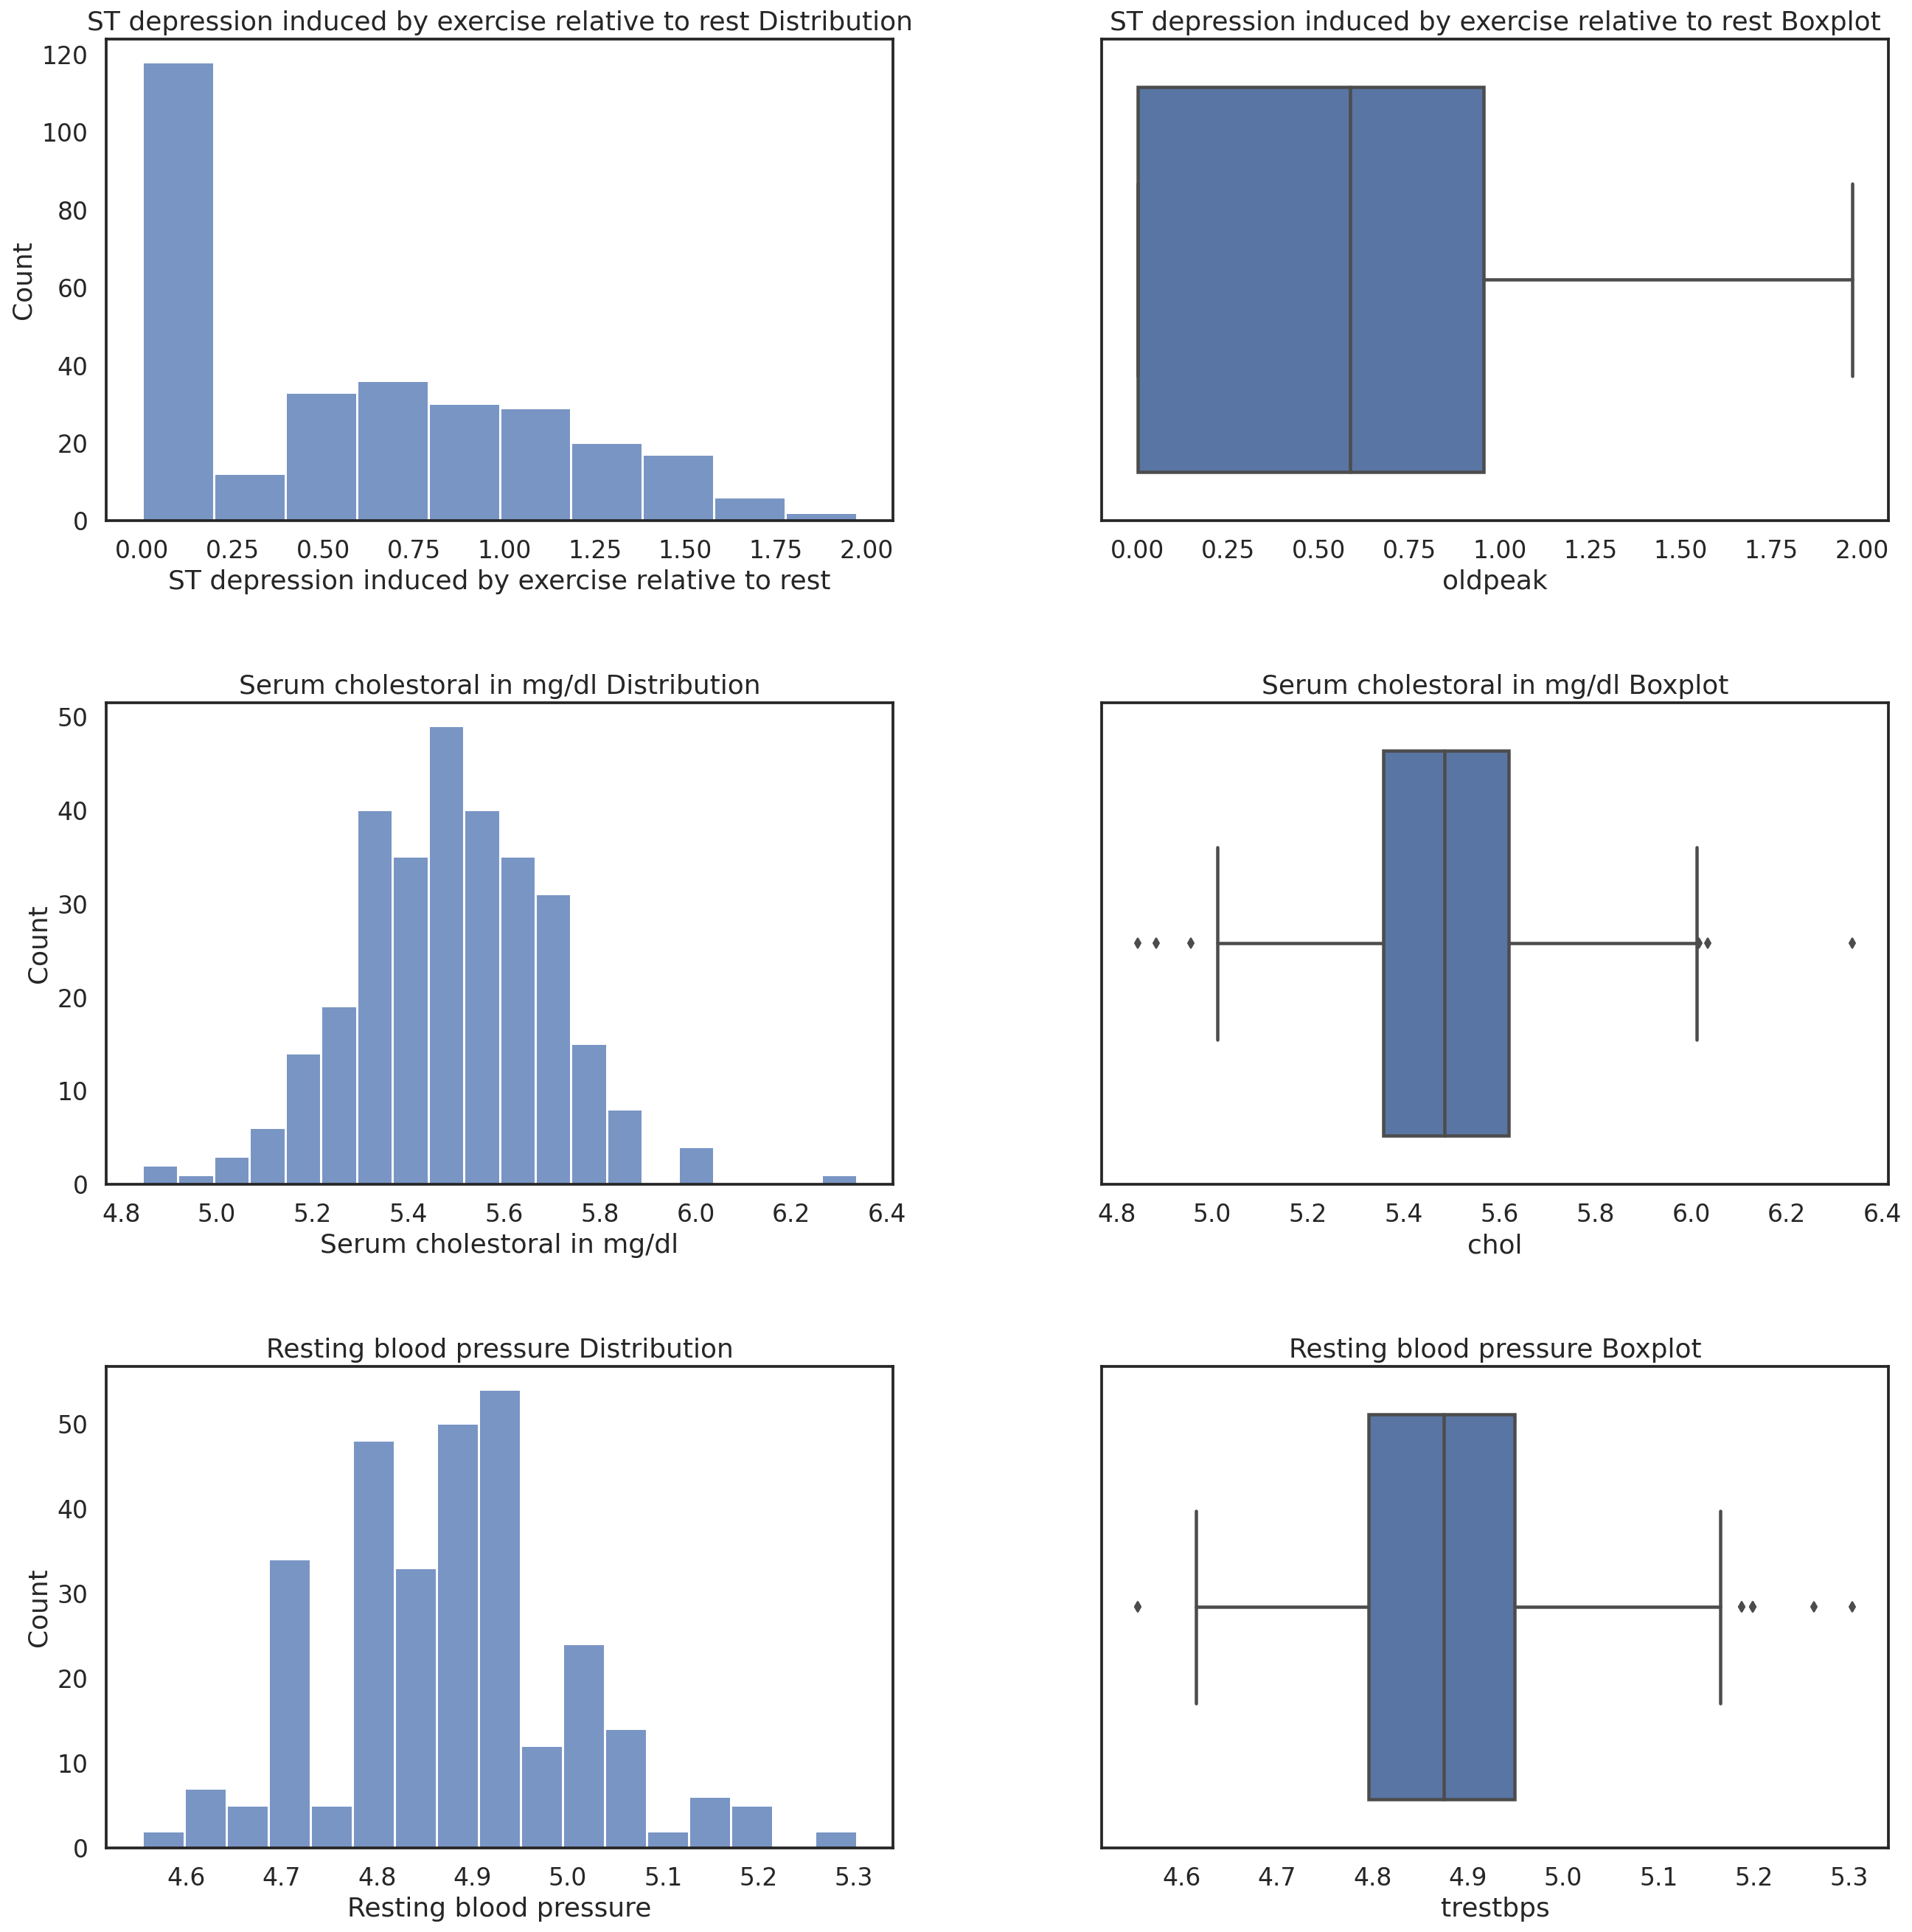

In [23]:
# Perform the skew transformation:

for col in skew_cols.index.values:
    df[col] = df[col].apply(np.log1p)


# display the results

# Explore the distribution of the variables and ouliers
fig, axList = plt.subplots(nrows=3, ncols=2)

fig.set_size_inches(20,20)   # size of plot
fig.tight_layout(pad=5.0)  # space between subplots  

#axList = axList.flatten()

for count, col_name in enumerate(skew_cols.index.values):
    axList[count, 0].set_title('{} Distribution'.format(numerical_cols_labels[col_name]))
    axList[count, 0].set_xlabel(numerical_cols_labels[col_name])
    sns.histplot(ax=axList[count, 0], x=df[col_name])
      
    axList[count, 1].set_title('{} Boxplot'.format(numerical_cols_labels[col_name]))
    axList[count, 1].set_xlabel(numerical_cols_labels[col_name])
    sns.boxplot(ax=axList[count, 1], x=df[col_name])


The transformation has decreased the number of outliers. This will improve the performance of some of the models to be evaluated which are sensitive to outliers, such us logistic regression or SVM.  



# Modelling

## Metrics

The problem is framed as a binary classification problem and <b>accuracy</b> is chosen as the main metric. Additionally, because the cost of failing to identify a patient with a heart disease is high, a high **recall** would be needed to minimize the outcome of false negatives.  

In [24]:
# Test options and evaluation metric
num_folds = 10
seed = 42
scoring = 'accuracy'

## Train and test dataset

We will use 80% of the dataset for modelling and 20% for validation.

In [25]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Define features 
features = [col for col in df.columns if col != target]

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed, stratify=y)

# quick check of datasets
print(f"Training set sample size: {X_train.shape[0]}")
print(f"Training target positive class: {round(100 * y_train.sum()/len(y_train),1)} %")
print(f"Test sample size: {X_test.shape[0]}")
print(f"Test target positive class: {round(100 * y_test.sum()/len(y_test),1)} %")

Training set sample size: 242
Training target positive class: 54.5 %
Test sample size: 61
Test target positive class: 54.1 %


## Baseline model

There's no free lunch so we don't know which models will perform better. 

Let's establish a baseline as a reference to evaluate the performance of out models.



Since we have a binary target class, we could establish a very naive model just by always predicting the positive class which is true in the 54% of the cases

In [26]:
# Naive model, predicting 

# Number of positive instances in the target variable
nb_positive = sum(df["target"])
print(f"Number of patients with disease: {nb_positive}")

# Total number of observations
nb_total = len(df["target"])
print(f"Total number of patients: {nb_total}")

print("")

accuracy = nb_positive/nb_total
print(f"Accuracy for naive model: {round(accuracy,2)}")

nb_false_negative = 0 # since we always predict 1
recall = nb_positive/(nb_positive + nb_false_negative)
print(f"Recall for naive model: {round(recall,2)}")

f1_score_calc = 2 * (accuracy * recall) / (accuracy + recall)
print(f"F1 score for naive model: {round(f1_score_calc,2)}")





Number of patients with disease: 165
Total number of patients: 303

Accuracy for naive model: 0.54
Recall for naive model: 1.0
F1 score for naive model: 0.71


However, this model is rather simplistic. Let's create a basic model like Logistic Regression to create a more realistic reference of performance for this problem.

In [27]:
# Helper methods


from sklearn.metrics import accuracy_score,  f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,  roc_curve, precision_recall_curve

def get_metrics(y_test, y_pred):
    '''
    Calculate and report a summary relevant classification metrics
    Parameters:
                    y_test (array): Array of test target values
                    Y_pred (array): Array of predicted values

            Returns:
                    None 
    '''
 

    # classification report
    cr = classification_report(y_test, y_pred)
    print(cr)
    print("")

    score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                             'precision': precision_score(y_test, y_pred),
                             'recall': recall_score(y_test, y_pred),
                             'f1': f1_score(y_test, y_pred),
                             'auc': roc_auc_score(y_test, y_pred)},
                             index=pd.Index([0]))

    print(score_df)
    print("")
    
    

def plot_confusion_matrix(model_name, y_test, y_pred):
    ''' 
    Calculate and plot confusion matrix
    Parameters:
                    y_test (array): Array of test target values
                    Y_pred (array): Array of predicted values

            Returns:
                    None 
 
    '''
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 30, "weight": "bold"})

    ax.set_title(model_name, fontsize=30)
    ax.set_xticklabels(['True', 'False'], fontsize=15);
    ax.set_yticklabels(['True', 'False'], fontsize=15);
    ax.set_ylabel('Prediction', fontsize=20);
    ax.set_xlabel('Ground Truth', fontsize=20)
    
    

              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61


   accuracy  precision    recall       f1       auc
0  0.819672   0.789474  0.909091  0.84507  0.811688



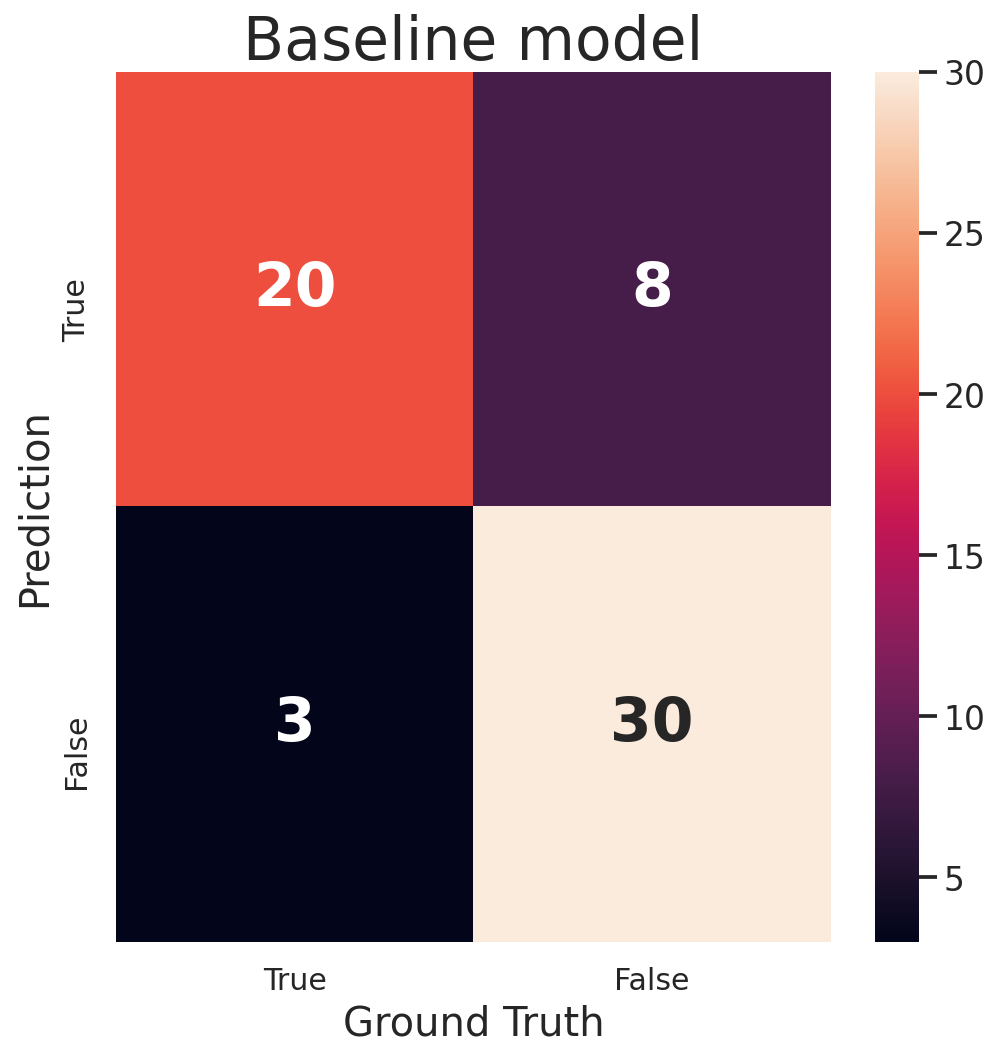

In [28]:
# Baseline model

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression



lr = LogisticRegression(solver='liblinear', random_state=seed)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


#kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
#cv_results = cross_val_score(lr, X_train, y_train, cv=kfold, scoring=scoring)

get_metrics(y_test, y_pred)
plot_confusion_matrix("Baseline model", y_test, y_pred)


## Supervised Learning Models

### Model application

Let's pick four models in addition to the Logistic Regression that can be appropiate for this kind of problem:

<ul>
    <li>Decision tree</i>
    <li>Random Forest</li>
    <li>k-Nearest Neighbors (KNN)</li>
    <li>Support Vector Machines (SVM)</li>
    

Logistic Regressor
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61


   accuracy  precision    recall        f1       auc
0  0.803279   0.756098  0.939394  0.837838  0.791126

Decision Tree
              precision    recall  f1-score   support

           0       0.71      0.61      0.65        28
           1       0.70      0.79      0.74        33

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61


   accuracy  precision    recall        f1       auc
0  0.704918   0.702703  0.787879  0.742857  0.697511

Random Forest
              precision    recall  f1-score   support

           0       0.95     

/home/dmarinh/anaconda3/envs/basic/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


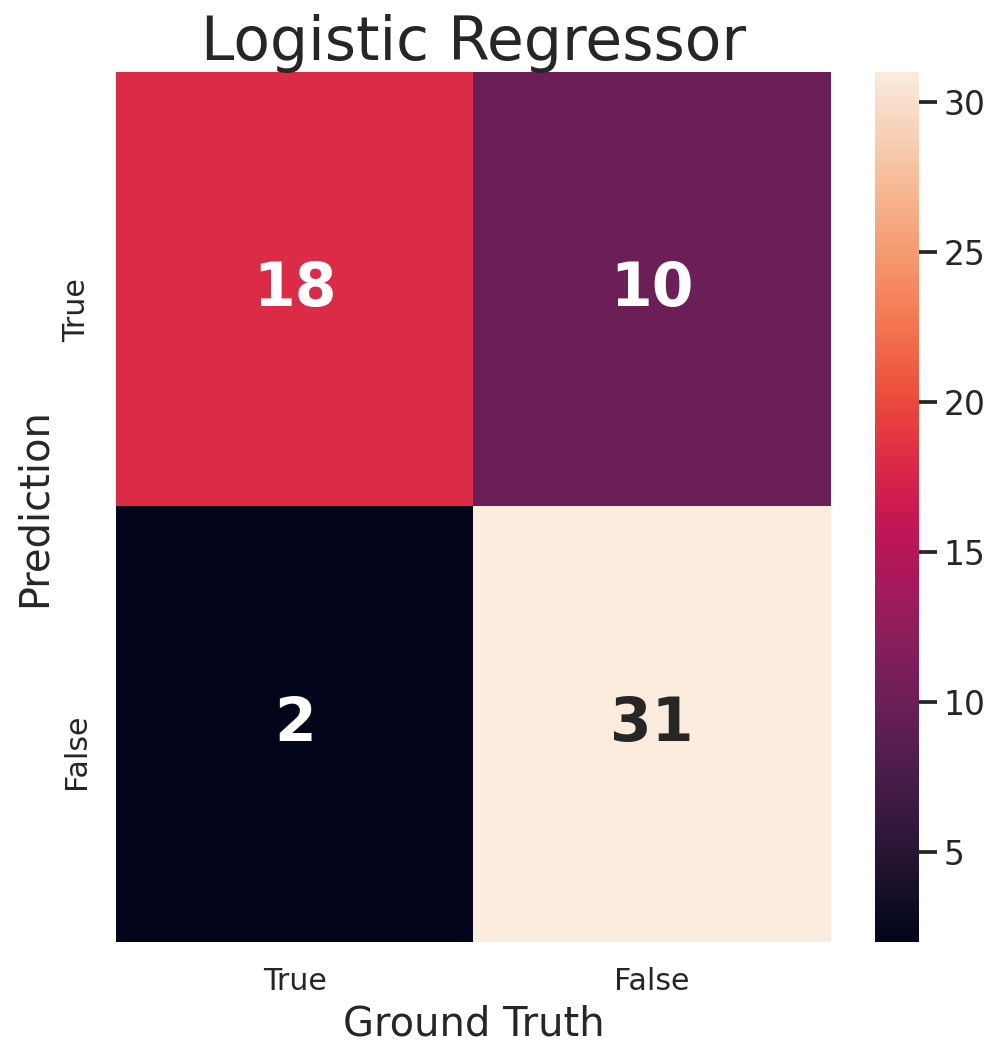

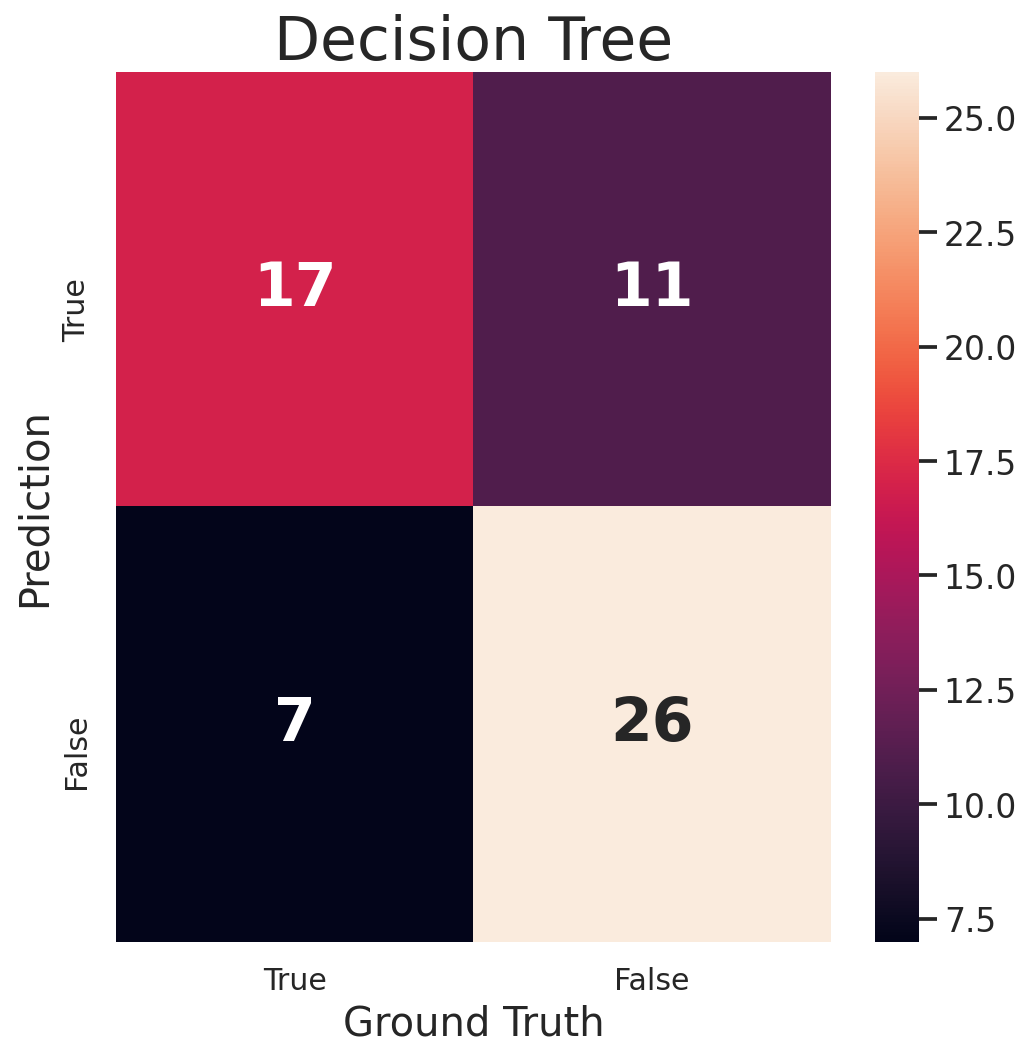

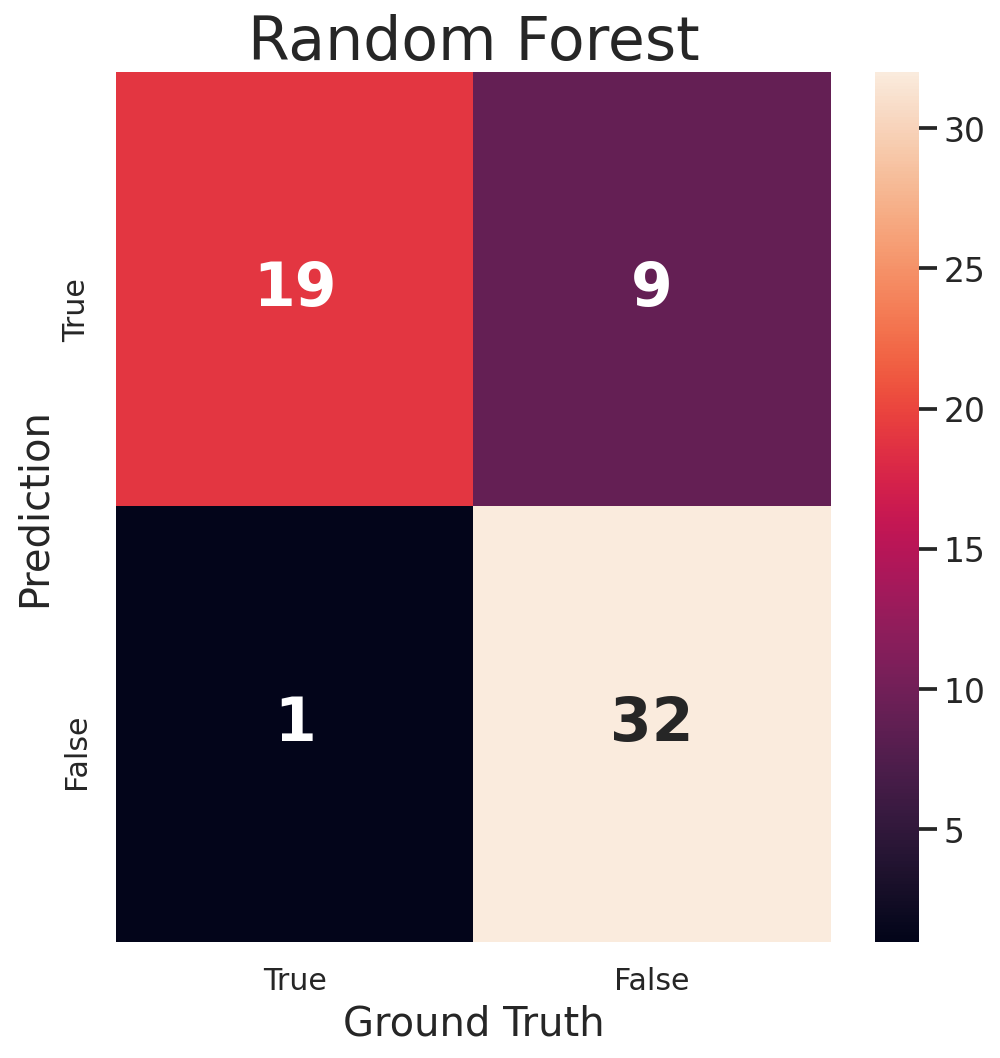

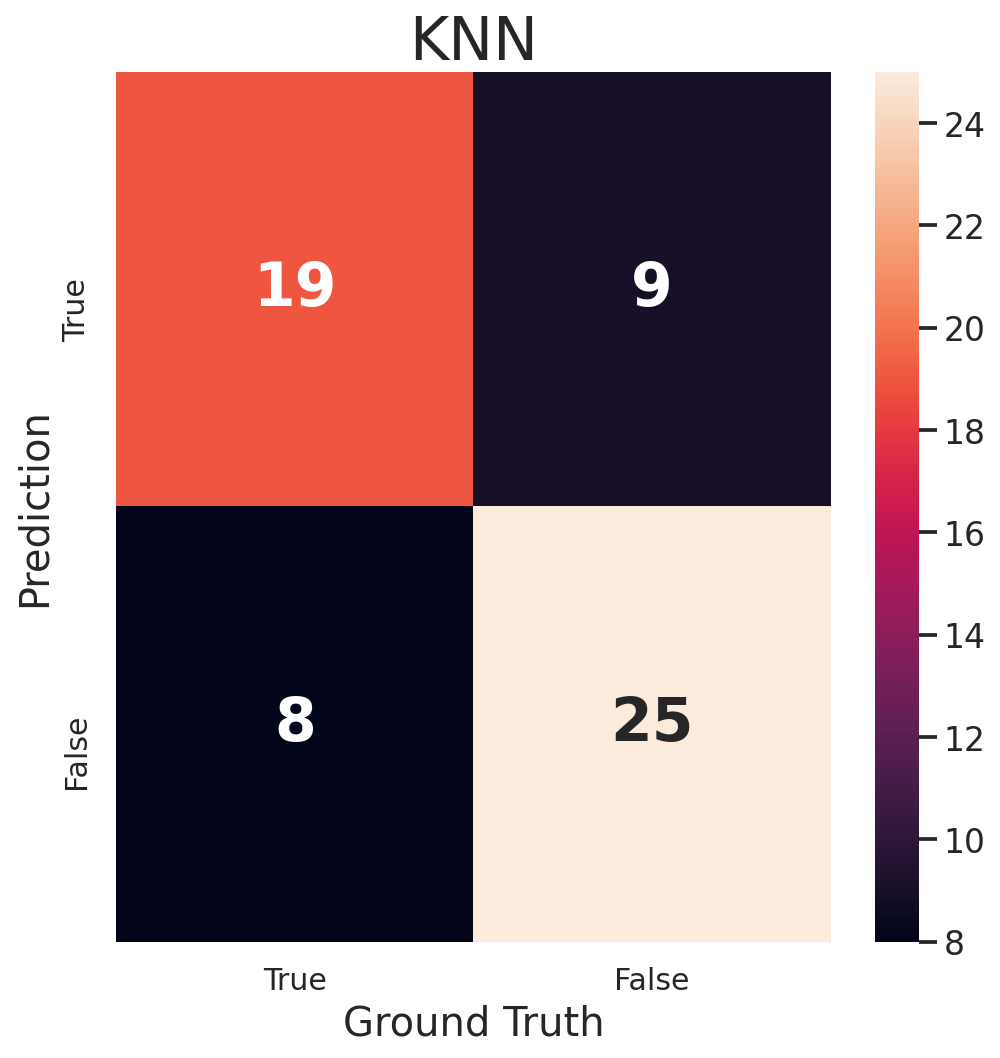

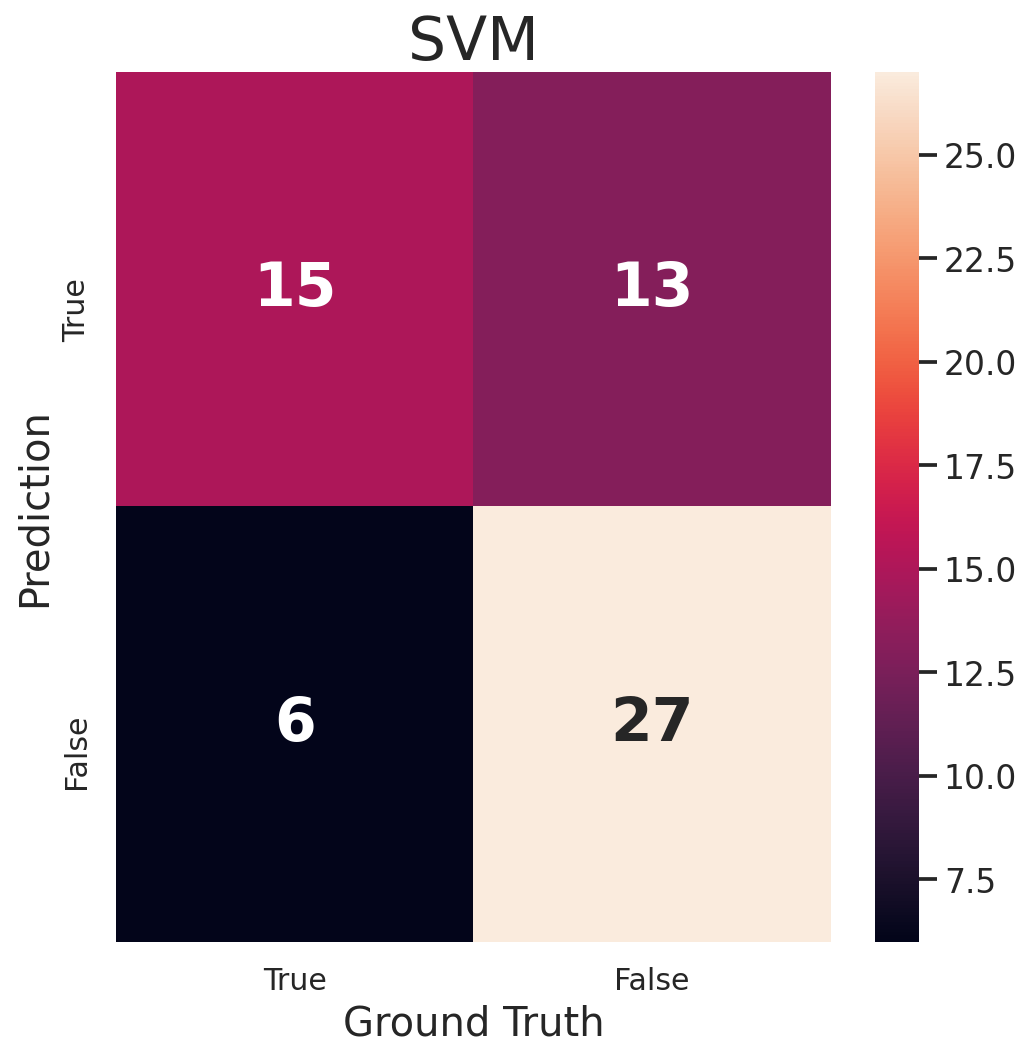

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


models = []
models.append(("Logistic Regressor", LogisticRegression(random_state=seed, max_iter=1000)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=seed)))
models.append(("Random Forest", RandomForestClassifier(random_state=seed)))
models.append(("KNN", KNeighborsClassifier()))
models.append(("SVM", SVC(random_state=seed)))



results = []
names = []

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("=========================")
    print(model_name)
    print("=========================")
    get_metrics(y_test, y_pred)
    plot_confusion_matrix(model_name, y_test, y_pred)


So far, Random Forest is the best performer.

However, some of the models evaluated like KNN or SVM are sensitive to the scale of the features. Let's bring the dataset features down to the same order of magnitude to prevent these models to outperform.  

We will use the standard scaler to transform the values so they have μ=0 and σ2=1.  This transormation is linear, therefore the actual shape of the distribution remains unchanged.

Logistic regression
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61


   accuracy  precision    recall        f1       auc
0  0.803279   0.756098  0.939394  0.837838  0.791126

DecisionTree
              precision    recall  f1-score   support

           0       0.71      0.61      0.65        28
           1       0.70      0.79      0.74        33

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61


   accuracy  precision    recall        f1       auc
0  0.704918   0.702703  0.787879  0.742857  0.697511

Random Forest
              precision    recall  f1-score   support

           0       0.95     

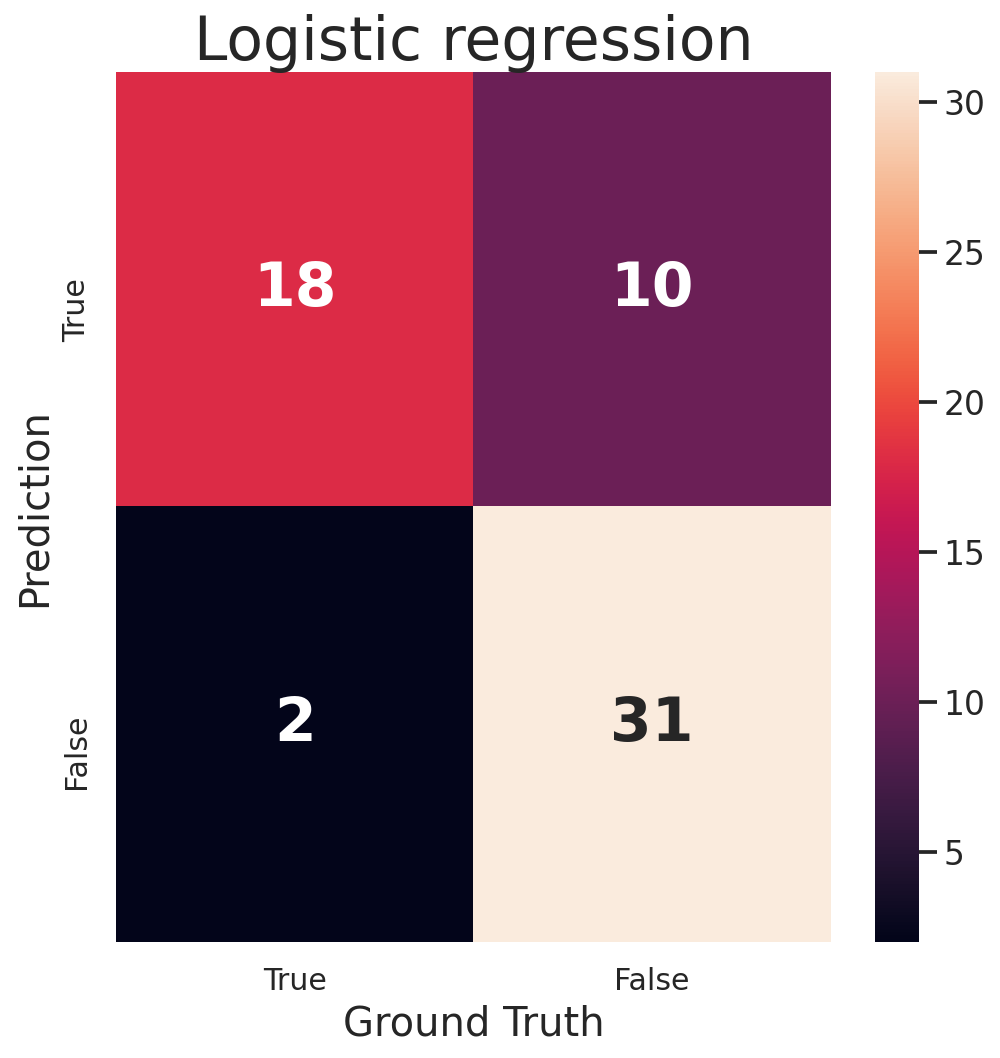

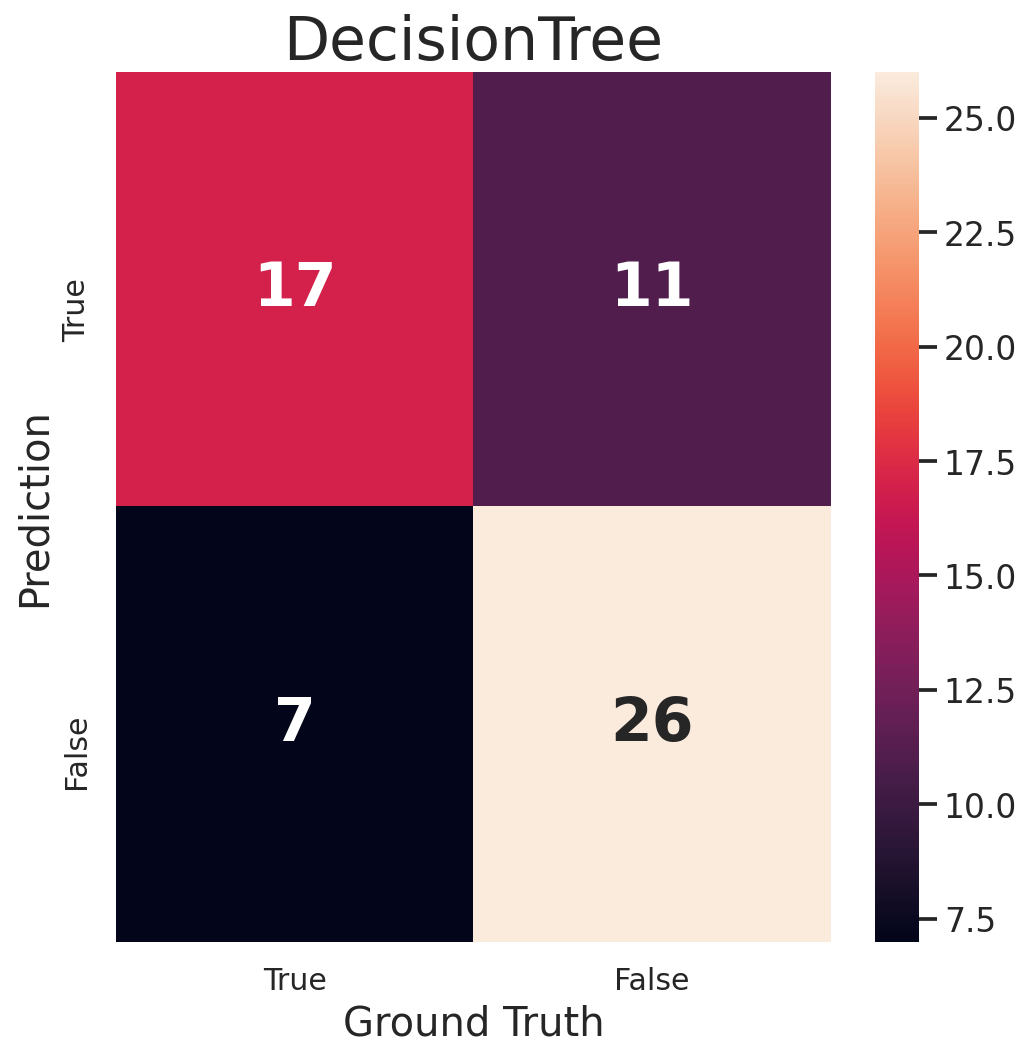

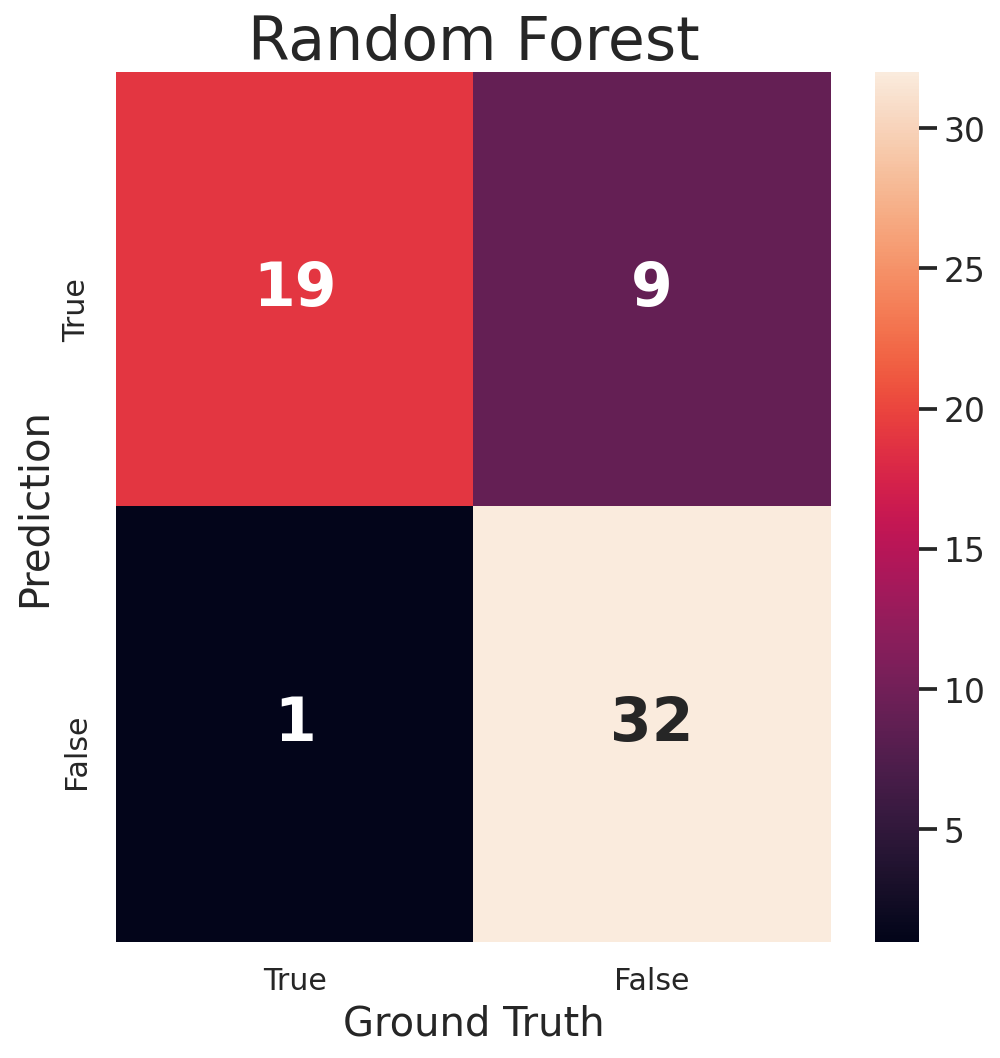

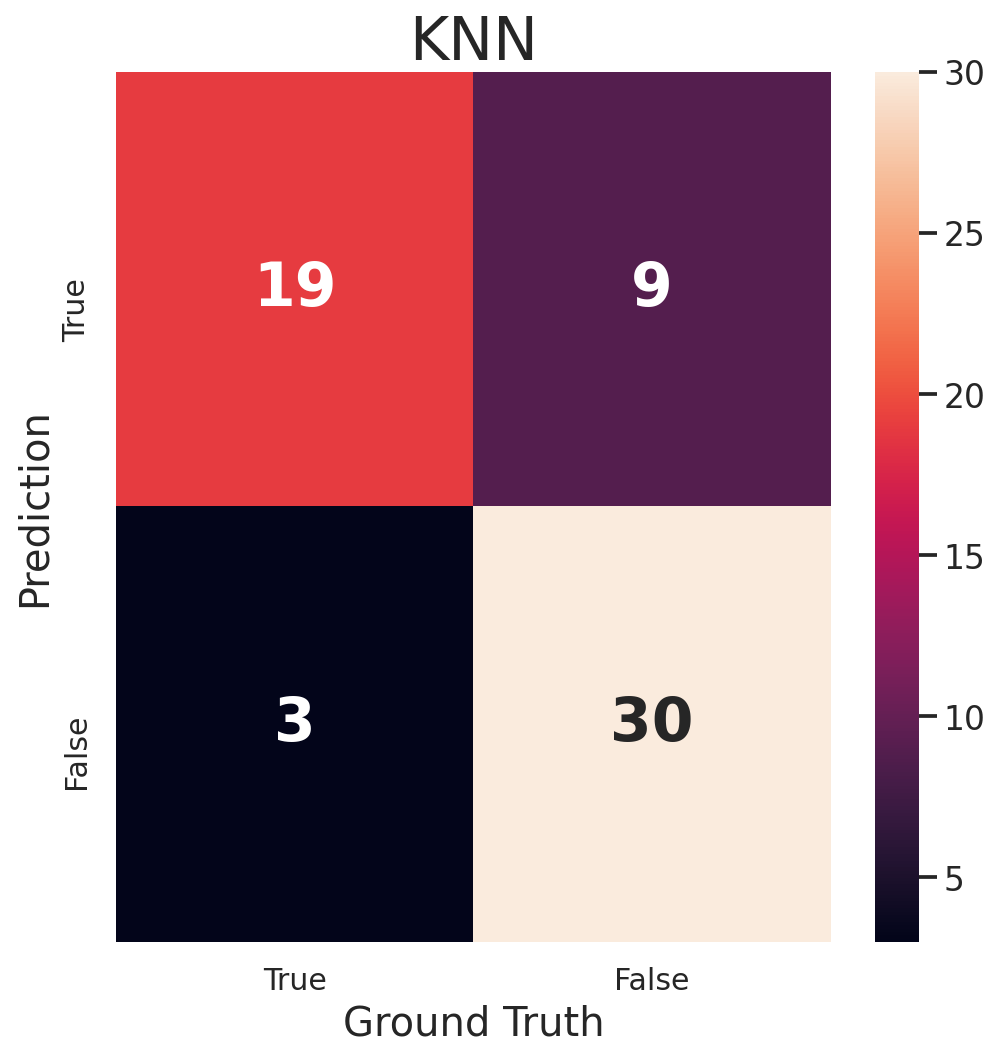

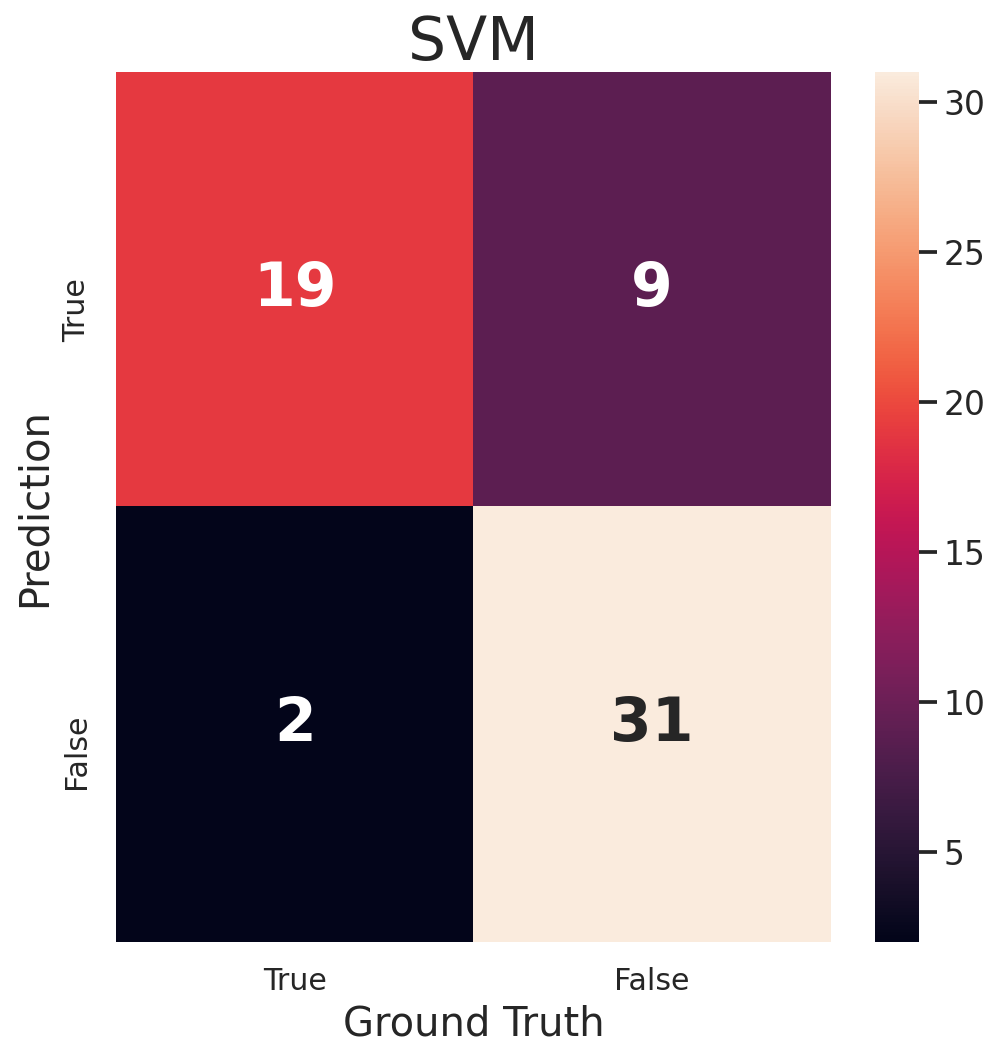

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



pipelines = []
pipelines.append(
                  ("Logistic regression", 
                      Pipeline([
                          
                          ("Logistic Regressor", LogisticRegression(max_iter=1000,random_state=seed))
                      ])
                  )
                )

pipelines.append(
                  ("DecisionTree", 
                      Pipeline([
                          
                          ("Decision Tree", DecisionTreeClassifier(random_state=seed))
                      ])
                  )
                )

pipelines.append(
                  ("Random Forest", 
                      Pipeline([
                          ("Random Forest", RandomForestClassifier(random_state=seed))
                      ])
                  )
                )

pipelines.append(
                  ("KNN", 
                      Pipeline([
                          ("Scaler", StandardScaler()),
                          ("KNN", KNeighborsClassifier())
                      ])
                  )
                )

pipelines.append(
                  ("SVM", 
                      Pipeline([
                          ("Scaler", StandardScaler()),
                          ("SVM", SVC(random_state=seed))
                      ])
                  )
                )





results = []
names = []
for name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print("=========================")
    print(name)
    print("=========================")
    get_metrics(y_test, y_pred)
    plot_confusion_matrix(name, y_test, y_pred)
    
    



After scaling, KNN and SVM have improved their performance but Random Forest remains with the best scores. 


## Final model


The Random Forest model shows the best results in all the metrics and it is the one that best fits the needs of the project. 

In particular, it shows a very high recall which is a key factor, as it minimizes the probabilty of leaving a heart-diseased patient unattended. 

As shown in the confusion matrix, the model returns only one false negative in the test dataset, while the number of false positives is high (as reflected in the poor precision score). This is a correct balance of precision-recall as the focus is set on minimizing the number of undecteded dieseases, being the cost of wrongly treating some healthy patients lower than leaving any ill patient undiagnosed.


In [31]:
model = RandomForestClassifier(random_state=seed).fit(X_train, y_train)


#### ROC and Precision-Recall curve

Plot the ROC and Precision-Recall curves

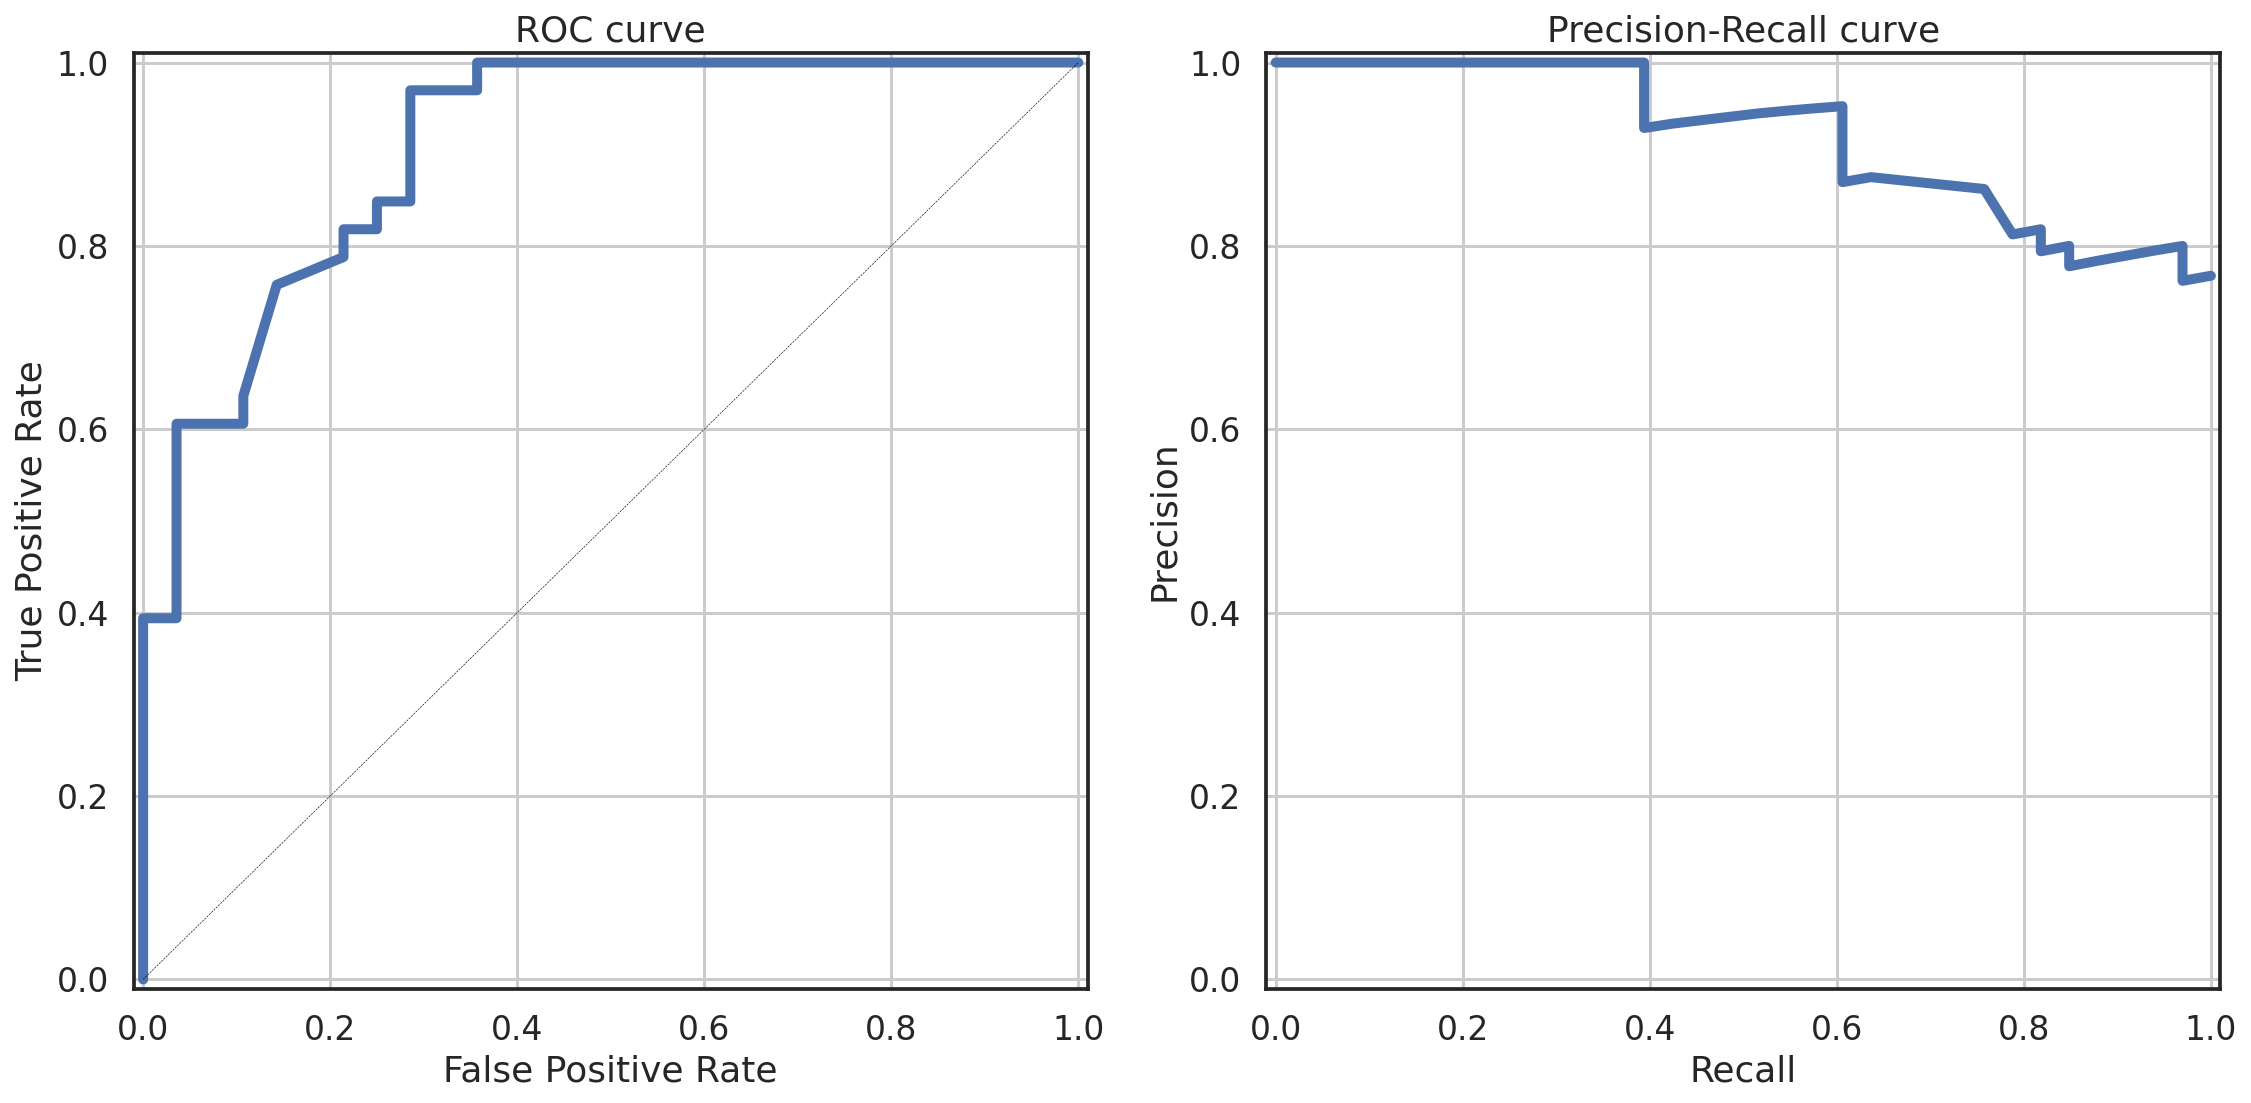

In [32]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = model.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr,  linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision,  linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

#### Features importance

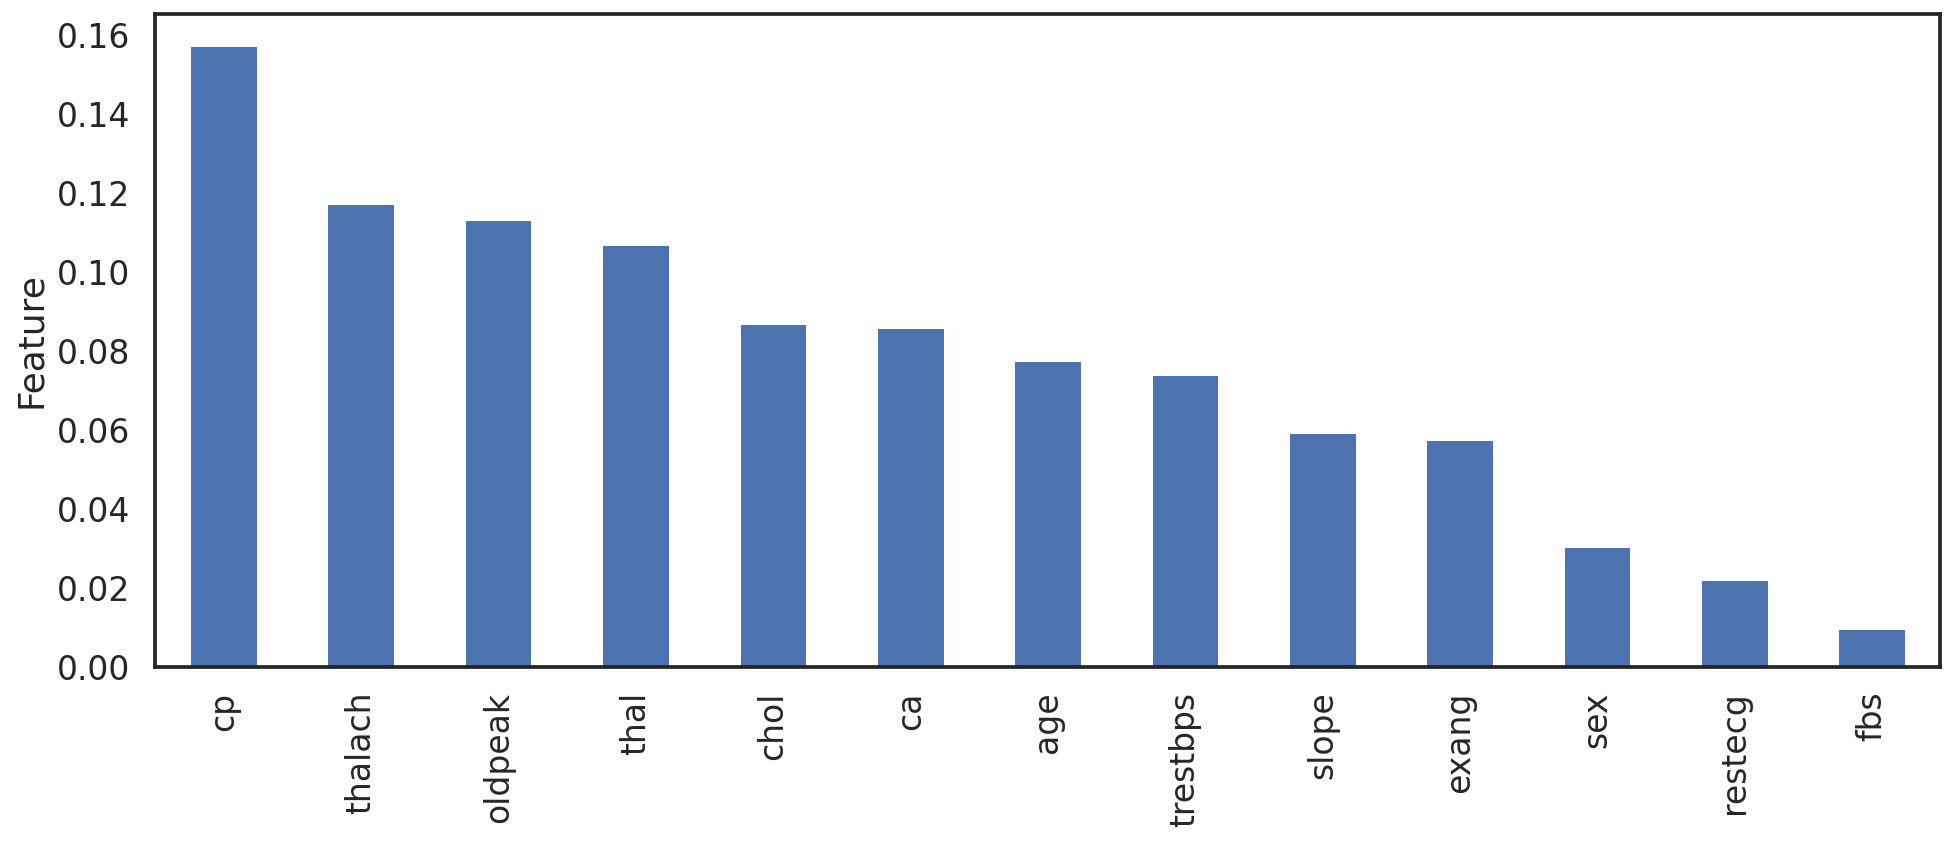

In [33]:
feature_imp = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');

The chest pain type, followed by the ST depression induced by exercise and the maximum heart rate achieved are the features that contribute the most to the heart disease emergence. 

The fasting blood sugar has little importance for the overall prediction.  